#Course 04

##Week-01

###Simmulating Time Series data

####Setup

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
!pip install -U tf-nightly-2.0-preview

ERROR: Could not find a version that satisfies the requirement tf-nightly-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-2.0-preview


In [0]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-beta0


In [0]:
# wrinting helper function to plot the graphs :

def plot_series( time , series , format = '-' , start = 0 , end = None , label = None):
  plt.figure(figsize = (10,6))
  plt.plot( time[start:end] , series[start:end] , format , label = label)
  plt.xlabel('time')
  plt.ylabel('value')
  if label:
    plt.legend(fontsize = 10)
  plt.grid(True)

####Trend and Seasonality

In [0]:
# lets now create the dataset :

def trend( time ,slope = 0 ):
  return slope * time

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


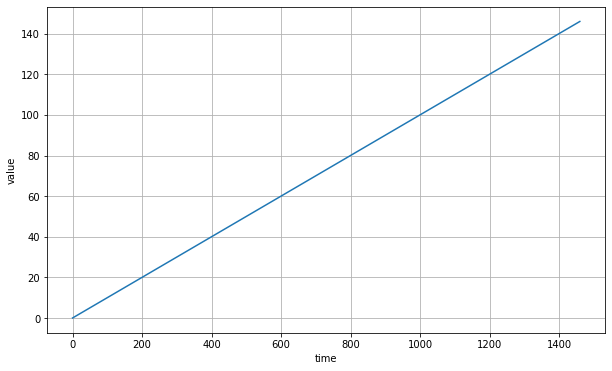

In [0]:
time = np.arange(4*365 + 1)
print(time[:50])
series = trend(time , 0.1)
plot_series(time ,series)
plt.show()

Lets us now define a function that returns : $\cos(2\pi x)$

Initial  X : 
 [0 1 2 3 4 5 6 7 8 9]

X after normalizing : 
 [0.         0.00273973 0.00547945 0.00821918 0.0109589  0.01369863
 0.01643836 0.01917808 0.02191781 0.02465753]

Corresponding Y values :
 [1.         0.99985184 0.9994074  0.99866682 0.99763031 0.99629817
 0.99467082 0.99274872 0.99053245 0.98802267 0.98522011 0.98212561
 0.97874008 0.97506453 0.97110005 0.96684781 0.96230908 0.95748519
 0.95237758 0.94698775]


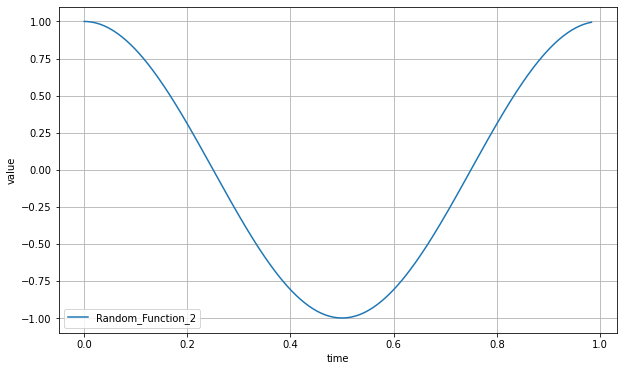

In [0]:
# define function Cos(2*pi*x)

def func_1(x):
  return np.cos(x * 2 * np.pi)

x = np.arange(360)
print('Initial  X : \n',x[:10])
# reduce x to range from 0 - 1 (appoximately )
x = (x % 365)/365
y = func_1(x)

print('\nX after normalizing : \n',x[:10])
print('\nCorresponding Y values :\n',y[:20])

plot_series(x,y,label = 'Random_Function_2')
plt.show()

Lets us define another function that returns : $\frac{1}{e^{3x}}$

Initial  X : 
 [0 1 2 3 4 5 6 7 8 9]

X after normalizing : 
 [0.         0.00273973 0.00547945 0.00821918 0.0109589  0.01369863
 0.01643836 0.01917808 0.02191781 0.02465753]

Corresponding Y values :
 [1.         0.99181451 0.98369602 0.97564398 0.96765785 0.9597371
 0.95188117 0.94408956 0.93636172 0.92869714 0.92109529 0.91355567
 0.90607777 0.89866108 0.89130509 0.88400932 0.87677327 0.86959645
 0.86247837 0.85541856]


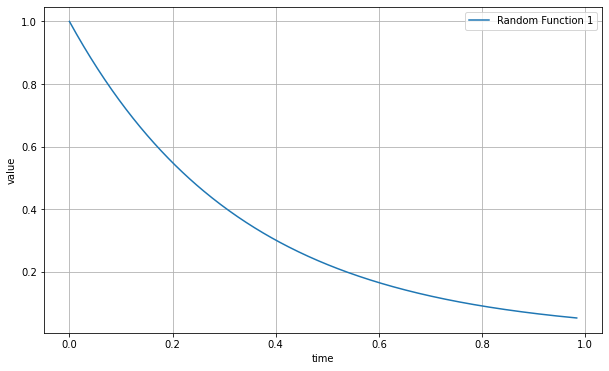

In [0]:
def func_2(x):
  return 1/np.exp(3 * x)

x = np.arange( 360)

print('Initial  X : \n',x[:10])
# reduce x to range from 0 - 1 (appoximately )
x = (x % 365)/365
y = func_2(x)

print('\nX after normalizing : \n',x[:10])
print('\nCorresponding Y values :\n',y[:20])

plot_series(x,y , label = 'Random Function 1')
plt.show()

In [0]:
# lets try to write a function to add a seasonal pattern to the time series 

def seasonal_pattern(season_time):
  return np.where(season_time < 0.4 , np.cos(season_time * 2 * np.pi) , 1/np.exp(3 * season_time))

def seasonality(time , period , amplitude = 1, phase = 0 ):
  reminder_wrt_period  = (time + phase) % period # value ranges from 0 - (period-1) , here 0-364 as period is 365
  season_time = (reminder_wrt_period) / period  # this value ranges from 0 - (appox)1 , here 0/365 to 364/365
  return amplitude * seasonal_pattern(season_time)


<class 'numpy.ndarray'>


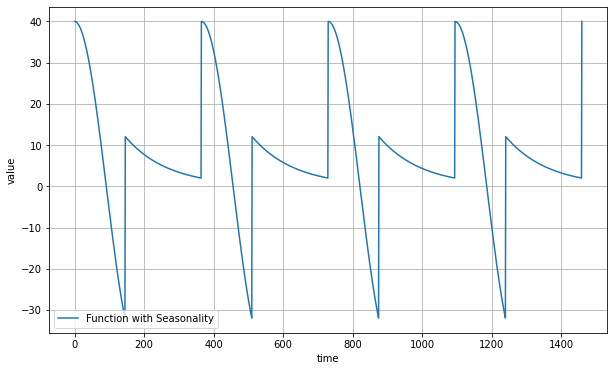

In [0]:
amplitude = 40

time = np.arange(4*365 + 1)

print(type(time))

series = seasonality(time , period = 365 , amplitude = amplitude)

plot_series(time, series , label = 'Function with Seasonality')

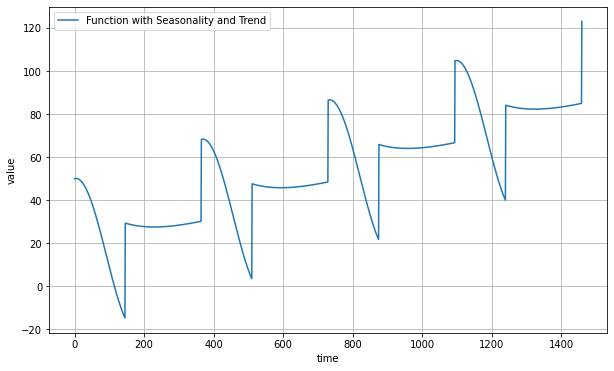

In [0]:
# Lets add a trend to this :

#time = np.arange(4*365 + 1)

baseline = 10 
slope = 0.05

series = baseline \
         + trend(time , slope) \
         + seasonality(time , period = 365 , amplitude = amplitude)
         
plot_series(time , series , label = 'Function with Seasonality and Trend')
plt.show()

####White-Noise  and Use it to Generate Noisy Series 

In [0]:
# Returns an array of random noise values equal to the size/no of elements in the time array
def white_noise_fn(time , noise_level , seed = None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

In [0]:
time = np.arange(4*365 + 1)

series_1 = [baseline]*len(time)

print(len(series_1))

1461


Lets now generate a noisy function :

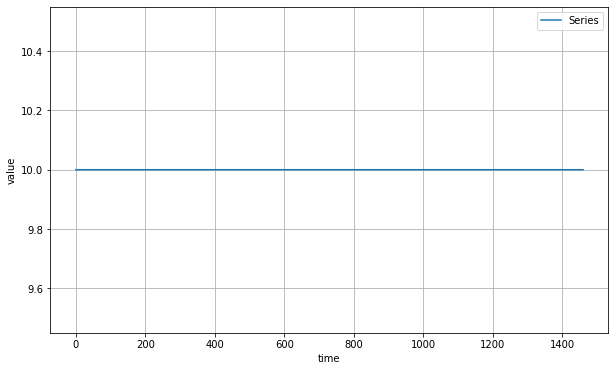

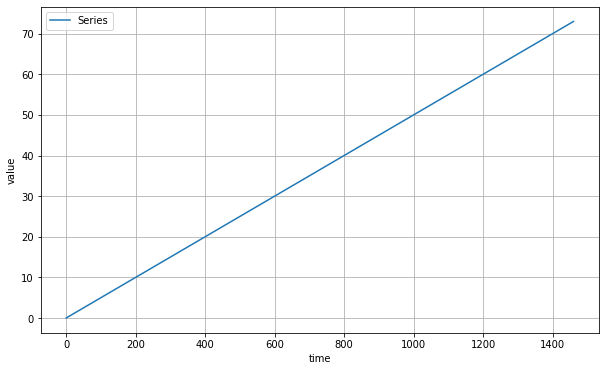

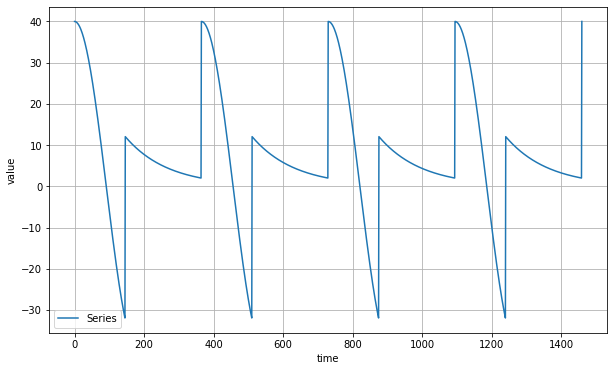

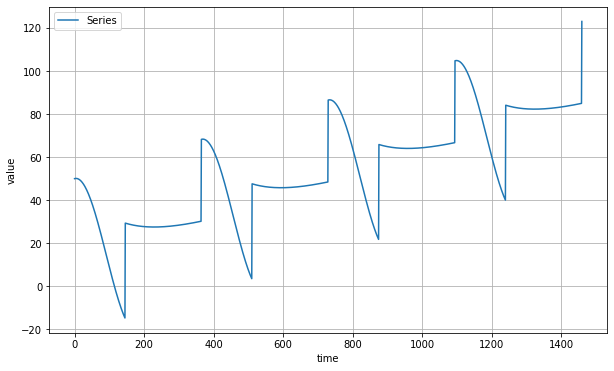

In [0]:
baseline, slope = 10, 0.05
time = np.arange(4*365 + 1)


series_1 = [baseline]*len(time)
plot_series(time , series_1 , label = 'Series')

series_2 = trend(time , slope)
plot_series(time , series_2 , label = 'Series')

series_3 = seasonality(time , period = 365 , amplitude = amplitude)
plot_series(time , series_3 , label = 'Series')



series = baseline \
         + trend(time , slope) \
         + seasonality(time , period = 365 , amplitude = amplitude)

# ---- or you can write it as -------------
#series = series_1 + series_2 + series_3

plot_series(time , series , label = 'Series')
plt.show()

1461
<class 'numpy.ndarray'>


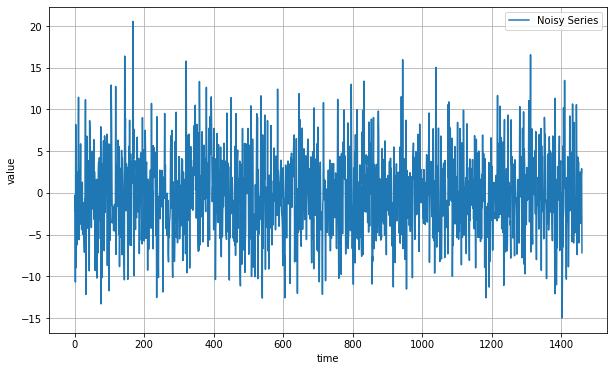

In [0]:
noise_level = 5

time = np.arange(4*365 + 1)
print(len(time))

white_noise =  white_noise_fn(time , noise_level , seed = 2 )
print(type(white_noise))
plot_series(time , white_noise , label = 'Noisy Series')
plt.show()

Adding this to the Series above to make the noisy series :

<Figure size 720x432 with 0 Axes>

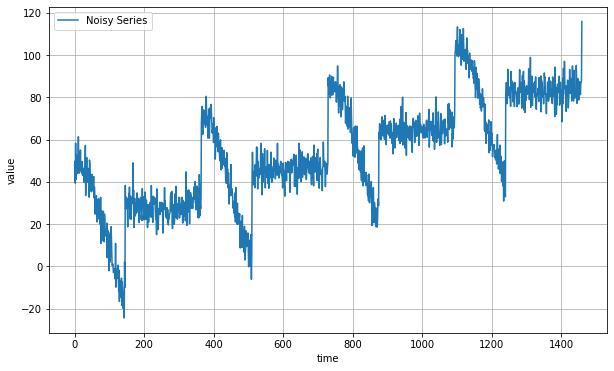

In [0]:
noisy_series = white_noise + series

plt.figure(figsize= (10,6))
plot_series(time , noisy_series , label = 'Noisy Series')
plt.show()

####Auto-Correlation

All right, this looks realistic enough for now. Let's try to forecast it. We will split it into two periods:

a) the training period and 

b) the validation period 

(in many cases, you would also want to have a test period). The split will be at time step 1000.

In [0]:
split_time = 1000

time_train = time[:split_time]
x_train = series[:split_time]
print(x_train.shape)

time_valid = time[split_time:]
x_valid = series[split_time:]
print(x_valid.shape)

(1000,)
(461,)


In [0]:
def autocorelation_1(time , amplitude , seed = None ):
  
  rnd = np.random.RandomState(seed)
  phi1, phi2 = 0.5,-0.1
  ar = rnd.randn(len(time) + 50 )
  #print(ar[:10])
  #print(ar.shape)
  ar[:50] = 100
  #print(ar[:10])


  for step in range(50 , len(time) + 50):
    ar[step] += phi1 * ar[step - 50]
    ar[step] += phi2 * ar[step-33]

  return ar[50:] * amplitude

print(time.shape)

series = autocorelation_1(time , amplitude =  10 , seed = 42)
print("\nType of the Series Generated : ",type(series))

(1461,)

Type of the Series Generated :  <class 'numpy.ndarray'>


In [0]:
def autocorelation_2(time , amplitude , seed = None ):
  rnd = np.random.RandomState(seed)
  phi1 = 0.8
  
  ar = rnd.randn(len(time) + 1 )
  
  for i in range(1 , len(time) +1):
    ar[i] = ar[i] + (phi1 * ar[i - 1])
  
  return ar[1:] * amplitude

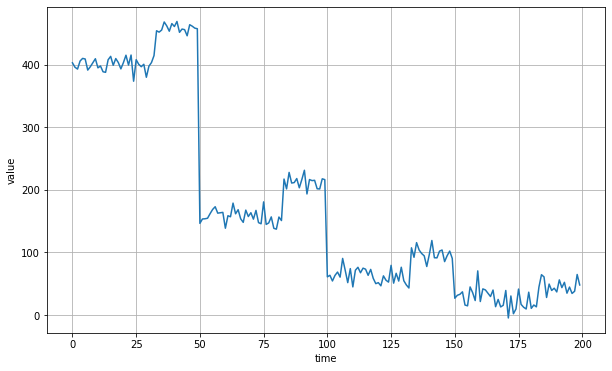

In [0]:
series = autocorelation_1(time , amplitude =  10 , seed = 42)
plot_series(time[:200], series[:200])
plt.show()

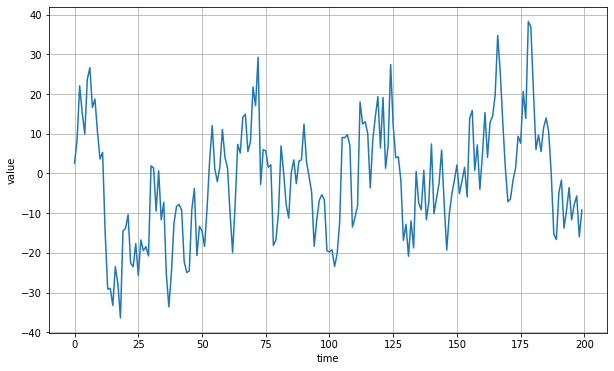

In [0]:
series = autocorelation_2(time , amplitude =  10 , seed = 42)
plot_series(time[:200], series[:200])
plt.show()

Lets add trend to it :

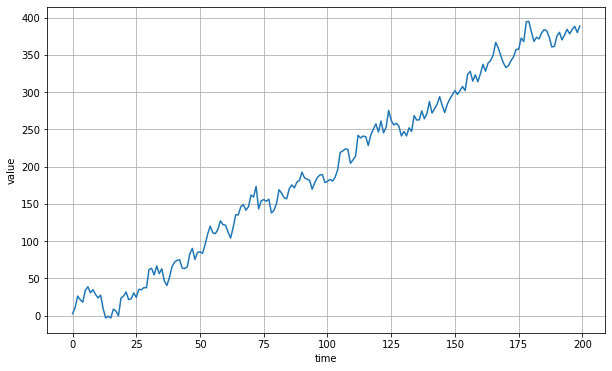

In [0]:
series = autocorelation_2(time , 10 , seed = 42 ) \
         + trend(time , 2)

plot_series(time[:200] , series[:200])
plt.show()

Adding Trend to Autocorelation_1 function :

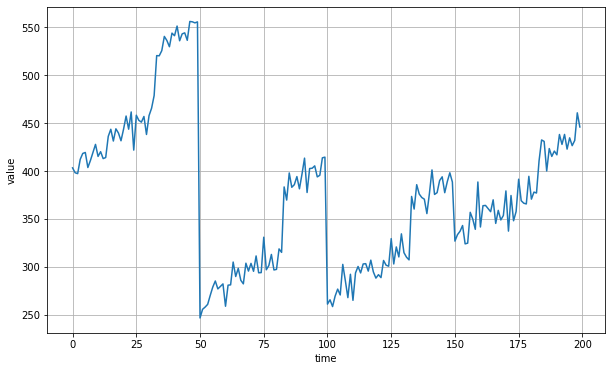

In [0]:
series = autocorelation_1(time , 10 , seed = 42 ) \
         + trend(time , 2)

plot_series(time[:200] , series[:200])
plt.show()

Let smake a little complex function using : 

1. trend() function 
2. seasonality() function 
3. autocorrelation_1() function 1 / autocorrelation_2() function 1

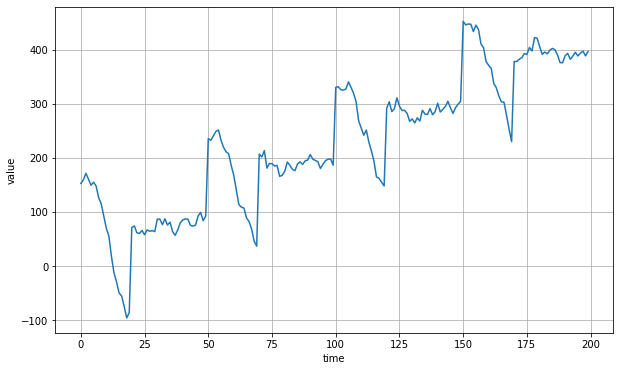

In [0]:
series = autocorelation_2(time , 10 , seed = 42) \
         + seasonality(time , period = 50 , amplitude = 150)\
         + trend(time ,2)

plot_series(time[:200] , series[:200])

plt.show()

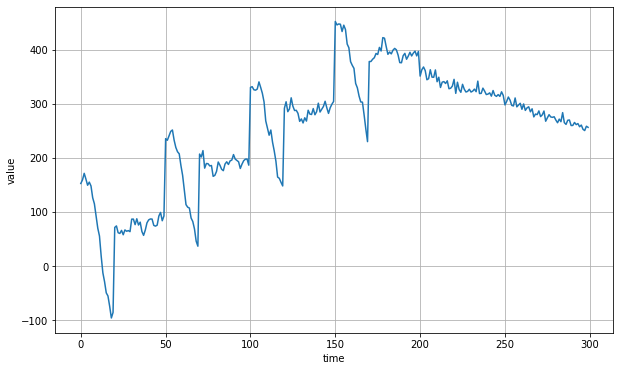

In [0]:
series_1 = autocorelation_1(time , 10 ,seed = 42) \
         + seasonality(time , period = 50 , amplitude = 150) \
         + trend(time , 2)

series_2 = autocorelation_1(time , 5 , seed = 42) \
           + seasonality(time , period = 50 , amplitude = 2) \
           + trend(time ,-1) + 550

series[200:] = series_2[200:]
plot_series(time[:300] , series[:300])
plt.show()

####Impulse and Auto-Correlation

In [0]:

# np.random.RandomState(42).rand()

def impulses(time , no_impulses , amplitude = 1 , seed = None):
  
  #create a random object
  rnd = np.random.RandomState(seed)

  #Select randomly the indices fo rthe spikes/impulse 
  impulse_indices = rnd.randint(len(time) , size = no_impulses )
  print('Impulse Indices : ',impulse_indices)
  
  #create the full series for the dataset :
  series = np.zeros(len(time))
  
  for index in impulse_indices:
    # rnd.rand() generates a random number
    # multiply with amplitude and put the values in places of inpulse_indices
    series[index] = series[index] + ( rnd.rand() * amplitude)
  
  return series

Impulse Indices :  [1126 1459  860 1294 1130 1095 1044  121  466 1238]


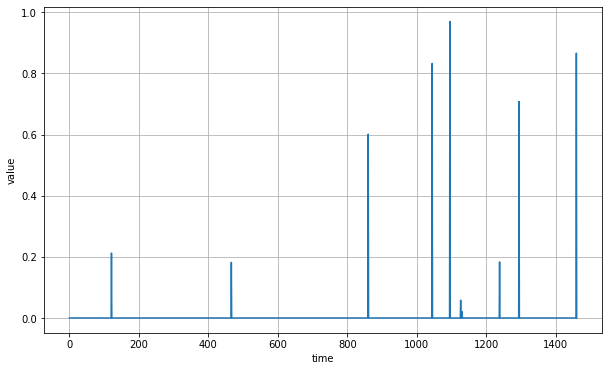

In [0]:
# Lets now create the series and then plot it :

series = impulses(time , no_impulses = 10 , amplitude = 1 ,seed = 42)

plot_series(time,series)

plt.show()

In [0]:
def autocorelation_3(source , phi):
  ar = source.copy()
  max_lag = len(phi)
  
  for step , value in enumerate(source):
    for lag,x in phi.items():
      if step - lag > 0 :
        ar[step] += x * ar[step - lag]
  return ar

Impulse Indices :  [1126 1459  860 1294 1130 1095 1044  121  466 1238]


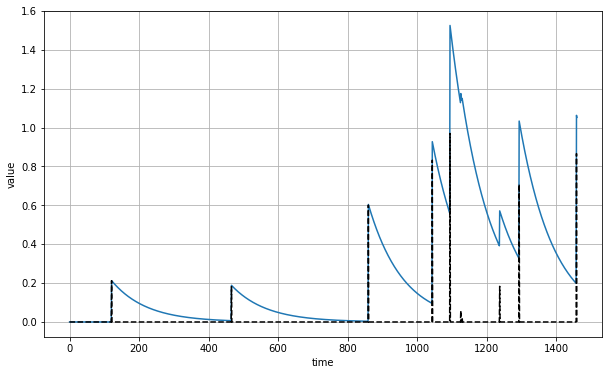

In [0]:
signal = impulses(time , 10 , seed = 42)

series = autocorelation_3(signal , {1:0.99})

plot_series(time ,series)
plt.plot(time , signal , "k--")
plt.show()

Impulse Indices :  [1126 1459  860 1294 1130 1095 1044  121  466 1238]


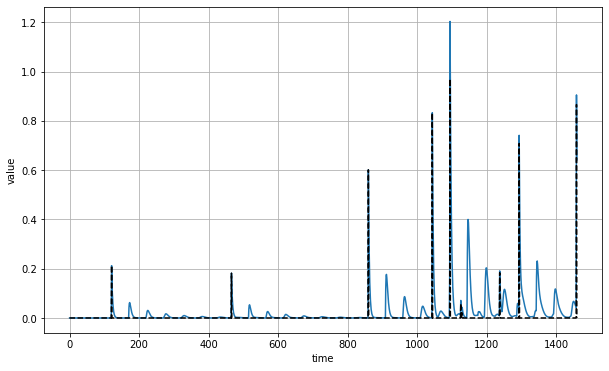

In [0]:
signal = impulses(time , 10 , seed = 42)
series = autocorelation_3(signal , {1:0.70 , 50:0.20})

plot_series(time ,series)

# comment below line to see the series only !!!
plt.plot(time , signal , "k--")

plt.show()

####Difference of two time series :

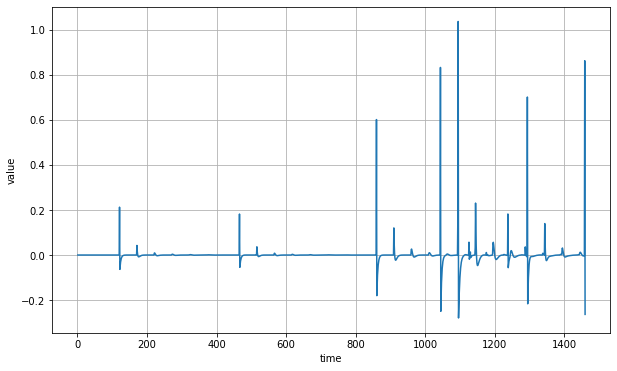

In [0]:
series_diff1 = series[1:] - series[:-1]
plot_series(time[1:], series_diff1)

#### Autocorelation Plotting Using pandas

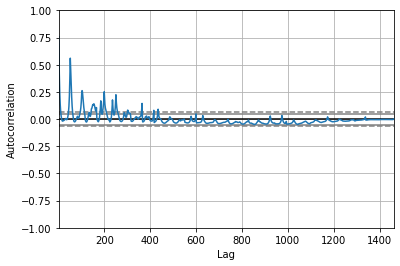

In [0]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)

#### ARIMA

In [0]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1460
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2223.428
Method:                       css-mle   S.D. of innovations              0.053
Date:                Thu, 23 Apr 2020   AIC                          -4432.855
Time:                        19:13:38   BIC                          -4395.852
Sample:                             1   HQIC                         -4419.052
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.384      0.701      -0.001       0.002
ar.L1.D.y     -0.1235      0.026     -4.714      0.000      -0.175      -0.072
ar.L2.D.y     -0.1254      0.029     -4.333      0.0

### Basic Prediction Approaches for the time series Data:

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
print(tf.__version__)

2.0.0-beta0


Now lets set up the data with Time Series Seasonality Trend and bit of Noise :

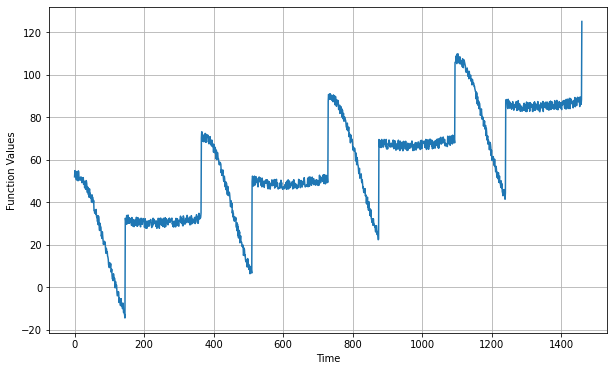

In [0]:

def plot_series(X, Y , label = None , start = 0 , end = None , format = '-'):
  #plt.figure(figsize = (10,6))
  plt.plot(X[start:end],Y[start:end] , format , label = label)
  plt.xlabel('Time')
  plt.ylabel('Function Values')
  plt.grid(True)


def trend(x, slope):
  return x*slope

def seasonal_patteren(season_time):
  return np.where(season_time < 0.4 , np.cos(2 * np.pi * season_time) , 1 / np.exp(3*season_time) )

def seasonality(time , period , amplitude = 1 , phase = 0 ):
  season_time = ((time + phase) % period) / period
  return amplitude*seasonal_patteren(season_time)

def noise(time , noise_level, seed = None):
  rnd = np.random.RandomState(seed = seed)
  return rnd.rand(len(time))*noise_level


time = np.arange(4*365 + 1 , dtype = 'float32')

baseline = 10

series = baseline \
         + trend(time, slope = 0.05) \
         + seasonality(time , period = 365 , amplitude = 40 , phase = 0)\
         + noise(time , noise_level = 5 , seed = 42)


plt.figure(figsize = (10,6))
plot_series(time ,series)
plt.show()

Now that we have a time series lets divide into train validation test for forcasting :

(1000,)
(461,)
69.25987036786665


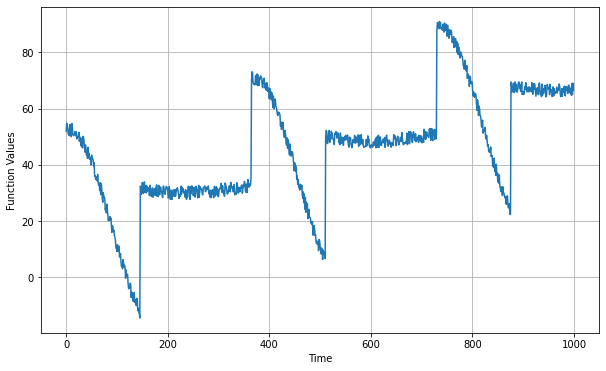

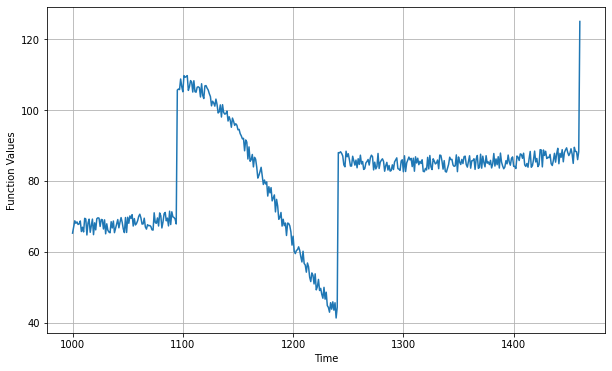

In [0]:
split_time = 1000

time_train = time[:split_time]
x_train = series[:split_time]
print(x_train.shape)


time_valid = time[split_time :]
x_valid = series[split_time:]
print(x_valid.shape)
print(x_valid[12])

plt.figure(figsize = (10,6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize = (10,6))
plot_series(time_valid , x_valid)
plt.show()


####Forcasting Techniques:

Naive Forecasting:

In [0]:
# lets take the entire validation part of the series except the last value
naive_forcast = series[split_time - 1 : -1] #take from series ....just one unit shifted from the valid set 
print(naive_forcast.shape)
print(naive_forcast[11])

(461,)
65.61091476280895


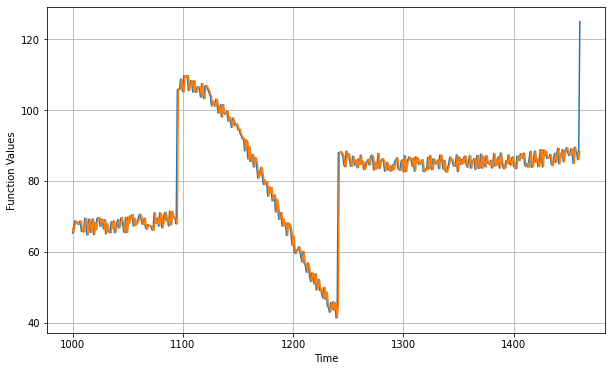

In [0]:
plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid)
plot_series(time_valid , naive_forcast)
plt.show()

Lets Try to Zoom into the starting phase :

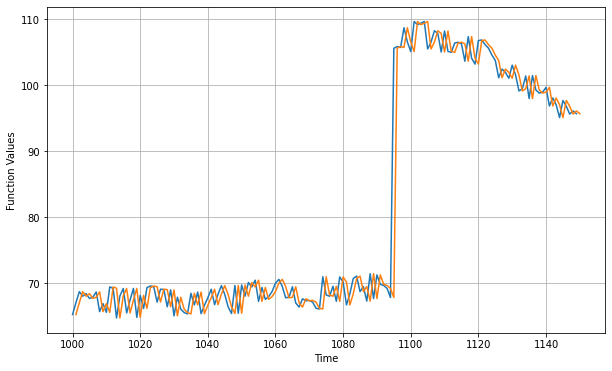

In [0]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start = 0, end = 150)
plot_series(time_valid, naive_forcast, start = 1, end = 151)

So basically Naive is just 1 step behind the validation set !!!

Lets now find the mean-squared-error and mean-absolute-error betwenn the forecasts and the predictions in the validation period

In [0]:
print(tf.keras.metrics.mean_squared_error(x_valid,naive_forcast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid,naive_forcast).numpy())

14.915372880316045
2.044857474863894


This is our baseline . Now lets try the Moving Average Method :

In [0]:
def moving_average_forecast(series , window_size):
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time+window_size].mean())
  return np.array(forecast)


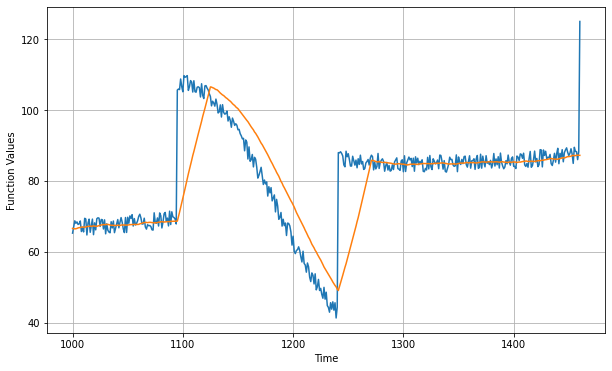

In [0]:
moving_average = moving_average_forecast(series , 30)[split_time-30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_average)

In [0]:
print(tf.keras.metrics.mean_squared_error(x_valid, moving_average).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_average).numpy())

88.88587992844113
5.46792220786647


That's worse than naive forecast! The moving average does not anticipate trend or seasonality, so let's try to remove them by using differencing. Since the seasonality period is 365 days, we will subtract the value at time *t* – 365 from the value at time *t*.

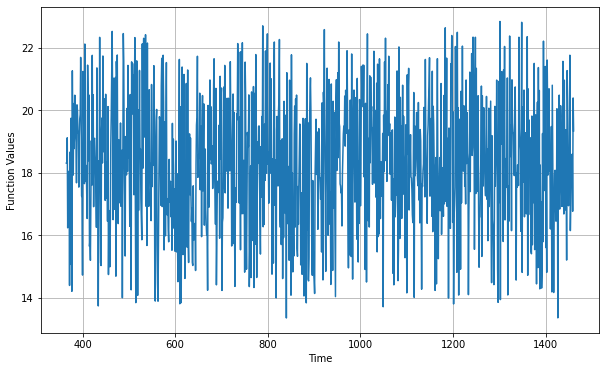

In [0]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

Great, the trend and seasonality seem to be gone, so now we can use the moving average:

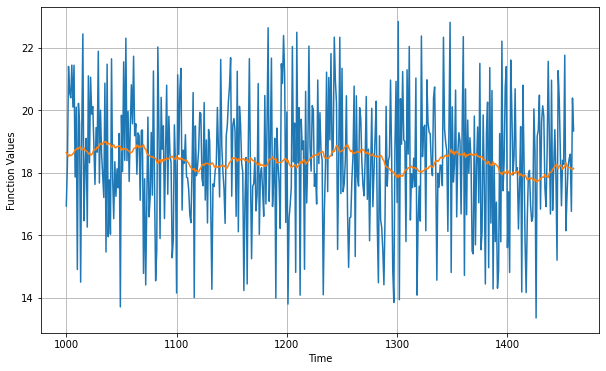

In [0]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

Now let's bring back the trend and seasonality by adding the past values from t – 365:

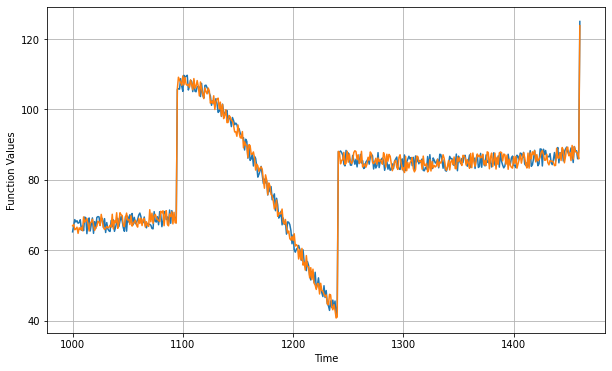

In [0]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [0]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

4.2680543230802055
1.661313523337758


Better than naive forecast, good. However the forecasts look a bit too random, because we're just adding past values, which were noisy. Let's use a moving averaging on past values to remove some of the noise:

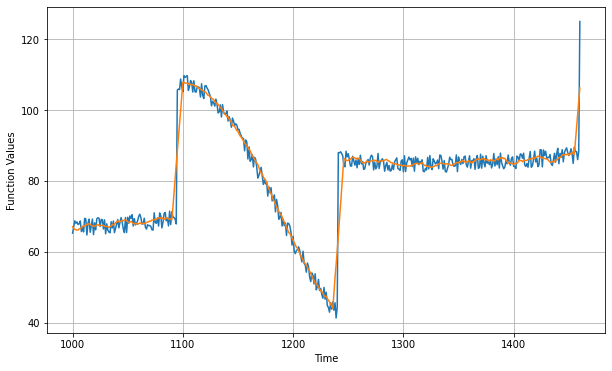

In [0]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [0]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

10.496939596054023
1.8651288830557378


###Exercise -01 

####Data Creation :

In [0]:
import tensorflow as tf
print(tf.__version__)

# EXPECTED OUTPUT
# 2.0.0-beta1 (or later)


2.0.0-beta0


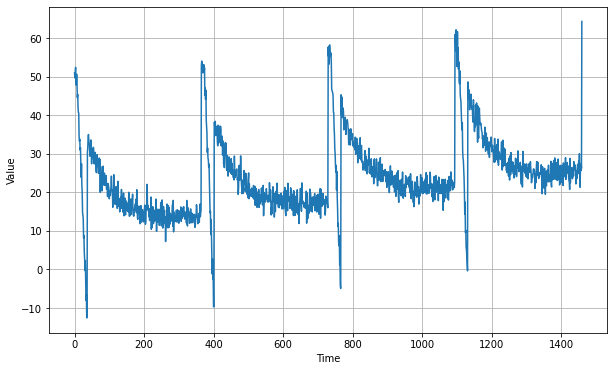

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 * np.pi),
                    1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.01
noise_level = 2

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

# EXPECTED OUTPUT
# Chart as in the screencast. First should have 5 distinctive 'peaks'

Now that we have the time series, let's split it so we can start forecasting



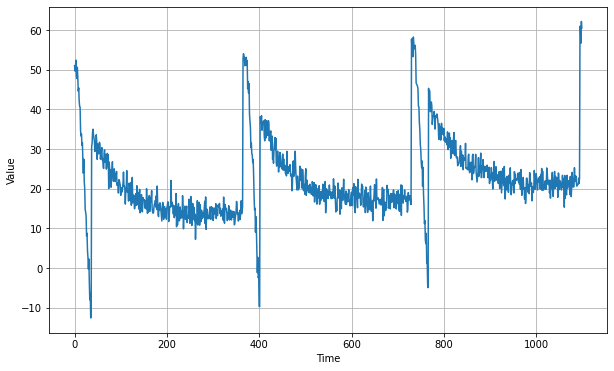

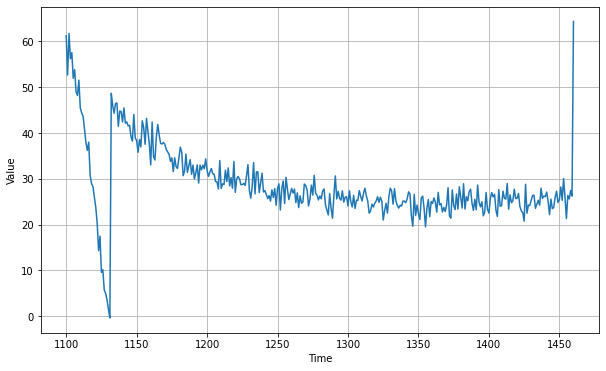

In [0]:
split_time = 1100

time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

# EXPECTED OUTPUT
# Chart WITH 4 PEAKS between 50 and 65 and 3 troughs between -12 and 0
# Chart with 2 Peaks, first at slightly above 60, last at a little more than that, should also have a single trough at about 0

####Naive Forecast

In [0]:
naive_forecast = series[split_time - 1:-1]#YOUR CODE HERE]

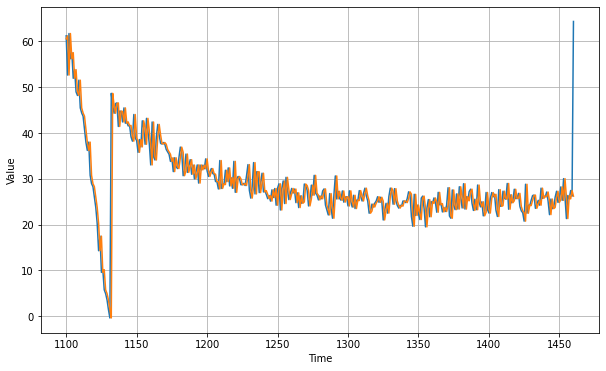

In [0]:
plt.figure(figsize = (10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

# Expected output: Chart similar to above, but with forecast overlay

Let's zoom in on the start of the validation period:

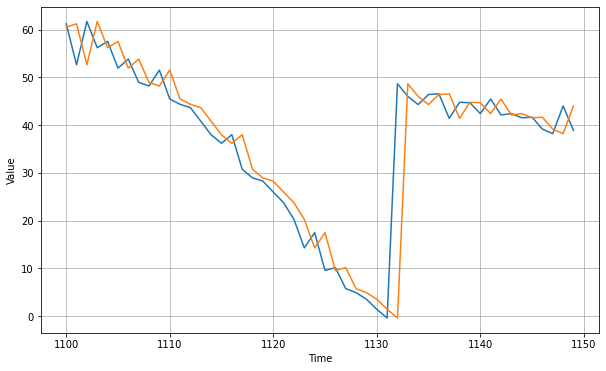

In [0]:
plt.figure(figsize=(10, 6))
plot_series(time_valid[:50] , x_valid[:50])# YOUR CODE HERE)
plot_series(time_valid[:50],naive_forecast[:50])# YOUR CODE HERE)

# EXPECTED - Chart with X-Axis from 1100-1250 and Y Axes with series value and projections. Projections should be time stepped 1 unit 'after' series

Now let's compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period:

In [0]:
print(tf.keras.metrics.mean_squared_error(x_valid,naive_forecast).numpy())# YOUR CODE HERE)

print(tf.keras.metrics.mean_absolute_error(x_valid,naive_forecast).numpy())# YOUR CODE HERE)
# Expected Output
# 19.578304
# 2.6011968

19.578304
2.6011968


####Moving Average Forecast:

That's our baseline, now let's try a moving average:

In [0]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  # YOUR CODE HERE
  predicted = []
  for i in range(len(series)- window_size):
    predicted.append(series[i:i+window_size].mean())
  return np.array(predicted)

(361,)


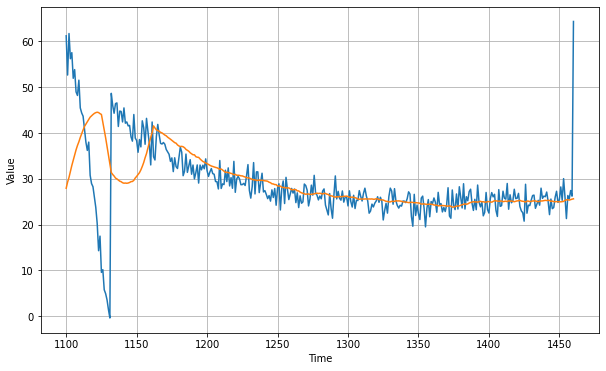

In [0]:
window_size = 30
moving_avg = moving_average_forecast(series,window_size)[(split_time-window_size):]# YOUR CODE HERE)[# YOUR CODE HERE]

print(moving_avg.shape)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)
    
# EXPECTED OUTPUT
# CHart with time series from 1100->1450+ on X
# Time series plotted
# Moving average plotted over it

In [0]:
print(tf.keras.metrics.mean_squared_error(x_valid,moving_avg).numpy())# YOUR CODE HERE)
print(tf.keras.metrics.mean_absolute_error(x_valid,moving_avg).numpy())# YOUR CODE HERE)
# EXPECTED OUTPUT
# 65.786224
# 4.3040023

65.786224
4.3040023


####Moving Average without Seasonality :

(1096,)


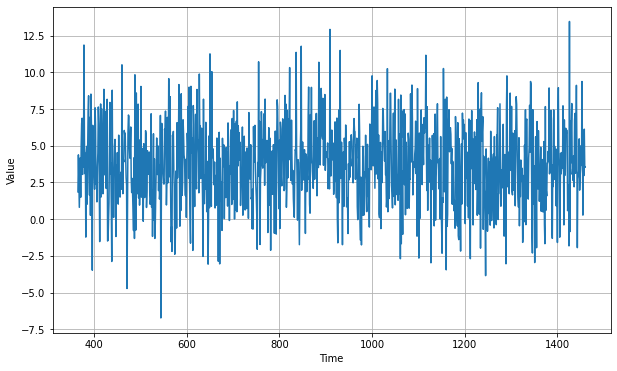

In [0]:
diff_series = (series[365:] - series[:-365])# YOUR CODE HERE)
diff_time = time[365:]# YOUR CODE HERE

print(diff_series.shape)
plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()
    
# EXPECETED OUTPUT: CHart with diffs

Great, the trend and seasonality seem to be gone, so now we can use the moving average:

(361,)


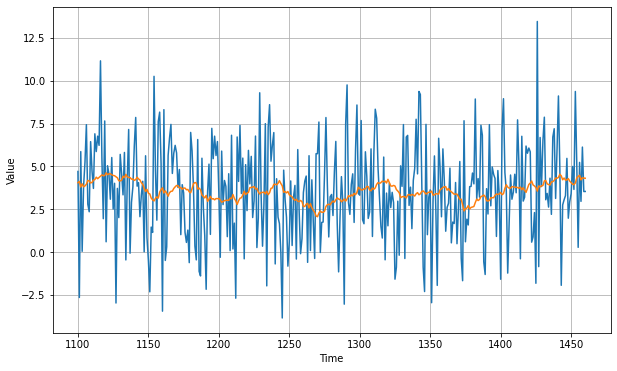

In [0]:
diff_moving_avg = moving_average_forecast(diff_series , window_size)[(split_time -365- window_size):]# YOUR CODE HERE

print(diff_moving_avg.shape)
plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time-365:])# YOUR CODE HERE)
plot_series(time_valid, diff_moving_avg )# YOUR CODE HERE)
plt.show()
            
# Expected output. Diff chart from 1100->1450 +
# Overlaid with moving average

Now let's bring back the trend and seasonality by adding the past values from t – 365:

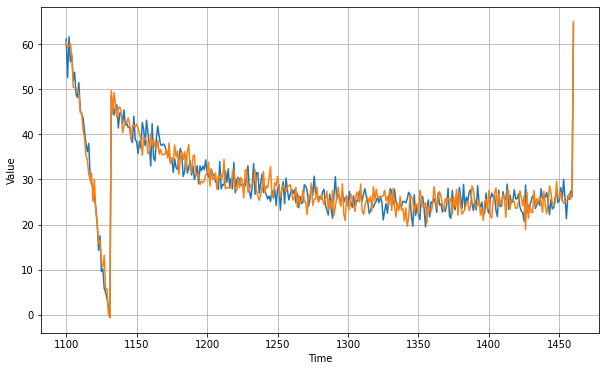

In [0]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg# YOUR CODE HERE

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)# YOUR CODE HERE)
plot_series(time_valid, diff_moving_avg_plus_past)# YOUR CODE HERE)
plt.show()
# Expected output: Chart from 1100->1450+ on X. Same chart as earlier for time series, but projection overlaid looks close in value to it

In [0]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())# YOUR CODE HERE)
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())# YOUR CODE HERE)
# EXPECTED OUTPUT
# 8.498155
# 2.327179

8.589116
2.3517225


Better than naive forecast, good. However the forecasts look a bit too random, because we're just adding past values, which were noisy. Let's use a moving averaging on past values to remove some of the noise:

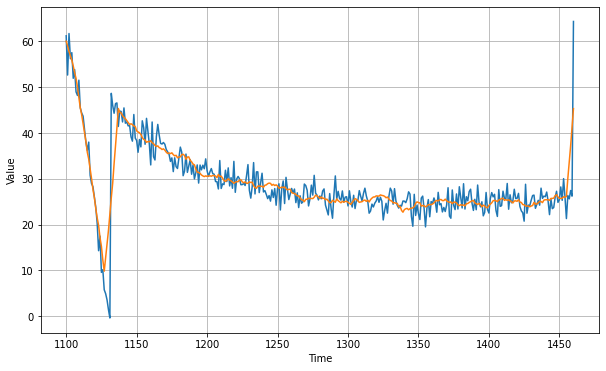

In [0]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg # YOUR CODE HERE

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)# YOUR CODE HERE)
plot_series(time_valid, diff_moving_avg_plus_smooth_past) # YOUR CODE HERE)
plt.show()
            
# EXPECTED OUTPUT:
# Similar chart to above, but the overlaid projections are much smoother

In [0]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())# YOUR CODE HERE)
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())# YOUR CODE HERE)
# EXPECTED OUTPUT
# 12.527958
# 2.2034433

12.551783
2.199329


##Week - 02

###Code snipets to understand the creation of sequence datasets

In [0]:
!pip install tensorflow==2.0.0-beta0

     |████████████████████████████████| 87.9MB 35kB/s 
     |████████████████████████████████| 501kB 43.8MB/s 
     |████████████████████████████████| 3.1MB 19.2MB/s 
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


The Target of the function is as below : 

In [0]:
''' 
Xs = [1,2,3,4,5,6,7,,8,9,10]

window_size = 4
batch_size = 3

Ys  =  [ [ 
           [1,2,3,4][5] ,
           [2,3,4,5][6] ,
           [3,4,5,6][7]   
         ],
         [ [4,5,6,7][8] , 
           [5,6,7,8][9] , 
           [6,7,8,9][10]  
         ]    
       ]
'''

' \nXs = [1,2,3,4,5,6,7,,8,9,10]\n\nwindow_size = 4\nbatch_size = 3\n\nYs  =  [ [ \n           [1,2,3,4][5] ,\n           [2,3,4,5][6] ,\n           [3,4,5,6][7]   \n         ],\n         [ [4,5,6,7][8] , \n           [5,6,7,8][9] , \n           [6,7,8,9][10]  \n         ]    \n       ]\n'

In [0]:
dataset = tf.data.Dataset.range(10)
print(type(dataset))

for i in dataset:
  print(i.numpy())

<class 'tensorflow.python.data.ops.dataset_ops.RangeDataset'>
0
1
2
3
4
5
6
7
8
9


In [0]:
## you can actually use windowing for this datasets :

dataset = tf.data.Dataset.range(10)

dataset = dataset.window(5,shift = 1)

print(type(dataset))

for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy() ,end = ' ')
  print()

<class 'tensorflow.python.data.ops.dataset_ops.WindowDataset'>
0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 
6 7 8 9 
7 8 9 
8 9 
9 


In [0]:

dataset = tf.data.Dataset.range(10).window( 5 , shift = 1 , drop_remainder = True)

print(type(dataset))

for x in dataset:

  for i in x:

    print(i.numpy() ,end = ' ')
    
  print()

<class 'tensorflow.python.data.ops.dataset_ops.WindowDataset'>
0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [0]:
dataset = tf.data.Dataset.range(10).window( 5 , shift = 1 , drop_remainder = True)

dataset = dataset.flat_map(lambda window : window.batch(5))

for i in dataset:
  print(i.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


Create the X and Y from the datasets :

In [0]:
dataset = tf.data.Dataset.range(10).window( 5 , shift = 1 , drop_remainder = True)

dataset = dataset.flat_map(lambda window : window.batch(5))

dataset = dataset.map(lambda window:(window[:-1],window[-1:]))

for x,y in dataset:
  print(x.numpy(),y.numpy())

[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [0]:
dataset = tf.data.Dataset.range(10).window( 5 , shift = 1 , drop_remainder = True)

dataset = dataset.flat_map(lambda window : window.batch(5))

dataset = dataset.map(lambda window:(window[:-1],window[-1:]))

dataset = dataset.shuffle(buffer_size = 10 )

for x,y in dataset:
  print("Type of X : ",type(x))
  print('Type of Y : ',type(y))
  break

for x,y in dataset:
  print(x.numpy(),y.numpy())

Type of X :  <class 'tensorflow.python.framework.ops.EagerTensor'>
Type of Y :  <class 'tensorflow.python.framework.ops.EagerTensor'>
[3 4 5 6] [7]
[2 3 4 5] [6]
[4 5 6 7] [8]
[5 6 7 8] [9]
[1 2 3 4] [5]
[0 1 2 3] [4]


In [0]:
dataset = tf.data.Dataset.range(10).window( 5 , shift = 1 , drop_remainder = True)

dataset = dataset.flat_map(lambda window : window.batch(5))

dataset = dataset.map(lambda window:(window[:-1],window[-1:]))

dataset = dataset.shuffle(buffer_size = 10 )

dataset = dataset.batch(2).prefetch(1)

for x,y in dataset:
  print("X = ",x.numpy())
  print("Y = ",y.numpy())

X =  [[0 1 2 3]
 [3 4 5 6]]
Y =  [[4]
 [7]]
X =  [[1 2 3 4]
 [4 5 6 7]]
Y =  [[5]
 [8]]
X =  [[5 6 7 8]
 [2 3 4 5]]
Y =  [[9]
 [6]]


### Now lets Create an end-2-end model for the series prediction :

Function for designing a series and plotting it :

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format = "-", start = 0, end = None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 * np.pi),
                    1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude = 1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.01
noise_level = 2

#-----------------------------------Create the series----------------------------

series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

#------------------------------------Update with noise---------------------------
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

# EXPECTED OUTPUT
# Chart as in the screencast. First should have 5 distinctive 'peaks'

Function for windowing and then creating the Train Test sets for the model :


In [0]:
## lets now define a function that will give the same output from a series as depicted above;

def windowed_dataset(series , window_size , batch_size , buffer_size):

  #create the dataset;
  dataset = tf.data.Dataset.from_tensor_slices(series)

  #window the dataset;
  dataset = dataset.window(window_size + 1 , shift = 1 , drop_remainder = True)

  #lets now flatten the datset 
  dataset = dataset.flat_map( lambda window : window.batch(window_size + 1))

  # shuffle the data ;
  dataset  =  dataset.shuffle(buffer_size)

  #create x  and y now from the dataset:
  dataset = dataset.map(lambda window : (window[:-1],window[-1]))

  #dive the data into batches :
  dataset = dataset.batch(batch_size).prefetch(1)

  return dataset

In [0]:
''' 
Xs = [1,2,3,4,5,6,7,,8,9,10]

window_size = 4
batch_size = 3

Ys  =  [ [ 
           [1,2,3,4][5] ,
           [2,3,4,5][6] ,
           [3,4,5,6][7]   
         ],
         [ [4,5,6,7][8] , 
           [5,6,7,8][9] , 
           [6,7,8,9][10]  
         ]    
       ]
'''

' \nXs = [1,2,3,4,5,6,7,,8,9,10]\n\nwindow_size = 4\nbatch_size = 3\n\nYs  =  [ [ \n           [1,2,3,4][5] ,\n           [2,3,4,5][6] ,\n           [3,4,5,6][7]   \n         ],\n         [ [4,5,6,7][8] , \n           [5,6,7,8][9] , \n           [6,7,8,9][10]  \n         ]    \n       ]\n'

Divide the data into Train and Test 

In [0]:
time = np.arange(4*365 + 1)

split_time = 1000

time_train = time[:split_time]
x_train = series[:split_time]

time_test =  time[split_time:]
x_test = series[:split_time]

Create the dataset from the series that we developed :

series --->  xtrain  ----> dataset from x_train

In [0]:
window_size = 20 
batch_size = 32 
shuffle_buffer_size = 1000

dataset = windowed_dataset(x_train , window_size , batch_size , shuffle_buffer_size)

print(type(dataset))


<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


A simple Linear Model :

In [0]:
l0 = tf.keras.layers.Dense(units = 1, input_shape = [window_size])
model = tf.keras.models.Sequential([l0])

Compile and Train the Model 

In [0]:
model.compile(loss = 'mse' , optimizer = tf.keras.optimizers.SGD(lr = 1e-6,momentum = 0.9))

history = model.fit(dataset,epochs = 100 , verbose = 1 )

Epoch 1/100
31/31 [==============================] - 0s 16ms/step - loss: 249.5240
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 116.8513
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 93.5359
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 81.1416
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 73.1235
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 67.3200
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 63.0179
Epoch 8/100
31/31 [==============================] - 0s 5ms/step - loss: 59.6841
Epoch 9/100
31/31 [==============================] - 0s 5ms/step - loss: 56.9877
Epoch 10/100
31/31 [==============================] - 0s 5ms/step - loss: 54.7270
Epoch 11/100
31/31 [==============================] - 0s 4ms/step - loss: 52.7747
Epoch 12/100
31/31 [==============================] - 0s 5ms/step - loss: 51.0493
Epoch 13/100
31/31 [==

Analyze the learned Weights :

In [0]:
# lets print the weights learned :

print("Layer Weights : {}".format(l0.get_weights()))

Layer Weights : [array([[ 0.06202153],
       [-0.18669045],
       [ 0.09902078],
       [ 0.26854992],
       [-0.21127729],
       [-0.03205363],
       [ 0.13335133],
       [-0.18961889],
       [ 0.02438546],
       [ 0.18106692],
       [-0.22537825],
       [ 0.17000811],
       [-0.02073577],
       [-0.115026  ],
       [-0.01770881],
       [ 0.00462295],
       [ 0.06351702],
       [ 0.21270286],
       [ 0.2969254 ],
       [ 0.47720593]], dtype=float32), array([0.02401186], dtype=float32)]


Use the Model to make some predictions

In [0]:
# a code for the prediction :

print(series[1:21])
print('\n')
print(series[1:21][np.newaxis])
print('\n')
model.predict(series[1:21][np.newaxis])

[49.660896 51.025326 52.424427 48.415695 47.780396 50.633144 48.099857
 44.583878 45.43716  42.13009  40.71074  40.59698  34.648506 33.284378
 33.772278 30.944027 31.588247 27.05832  23.896534 27.439226]


[[49.660896 51.025326 52.424427 48.415695 47.780396 50.633144 48.099857
  44.583878 45.43716  42.13009  40.71074  40.59698  34.648506 33.284378
  33.772278 30.944027 31.588247 27.05832  23.896534 27.439226]]




array([[27.425848]], dtype=float32)

lets predict for the series values 

In [0]:
#code for the generalised output ;

forecast = []

# we make prediction for the entire series :
# but while checking performance take into consideration only the x_text part 
for i in range(len(series) - window_size):
  forecast.append(model.predict(series[i:i+window_size][np.newaxis]))

forecast = forecast[split_time - window_size:]
results = np.array(forecast)[:,0,0]

print(len(forecast))
print(len(results))

461
461


Lets plot the predicted vs actual 

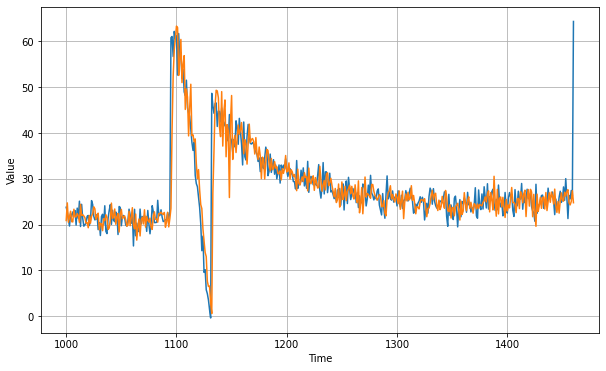

In [0]:
plt.figure(figsize=(10, 6))
plot_series(time[split_time:], series[split_time:])
plot_series(time[split_time:], results[:])
plt.show()

Calculate the error value

In [0]:
tf.keras.metrics.mean_absolute_error(series[split_time:] ,results[:]).numpy()

2.7249653

Develop a Deep Neural Network for the same Dataset :

In [0]:
window_size = 20 
batch_size = 32 
shuffle_buffer_size = 1000

dataset = windowed_dataset(x_train , window_size , batch_size , shuffle_buffer_size)

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(10 , input_shape = [window_size],activation = 'relu'),
                                    tf.keras.layers.Dense(15 , activation = 'relu'),
                                    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mse' , optimizer = tf.keras.optimizers.SGD(lr = 1e-6,momentum = 0.9))

history = model.fit(dataset,epochs = 200 , verbose = 1)

Epoch 1/200
31/31 [==============================] - 0s 15ms/step - loss: 146.6240
Epoch 2/200
31/31 [==============================] - 0s 5ms/step - loss: 65.2110
Epoch 3/200
31/31 [==============================] - 0s 5ms/step - loss: 56.1226
Epoch 4/200
31/31 [==============================] - 0s 5ms/step - loss: 50.2459
Epoch 5/200
31/31 [==============================] - 0s 5ms/step - loss: 45.5556
Epoch 6/200
31/31 [==============================] - 0s 5ms/step - loss: 41.9892
Epoch 7/200
31/31 [==============================] - 0s 5ms/step - loss: 39.1936
Epoch 8/200
31/31 [==============================] - 0s 5ms/step - loss: 36.8586
Epoch 9/200
31/31 [==============================] - 0s 5ms/step - loss: 34.9016
Epoch 10/200
31/31 [==============================] - 0s 5ms/step - loss: 33.2724
Epoch 11/200
31/31 [==============================] - 0s 5ms/step - loss: 31.8861
Epoch 12/200
31/31 [==============================] - 0s 5ms/step - loss: 30.6688
Epoch 13/200
31/31 [===

In [0]:
#code for the generalised output ;

forecast = []

# we make prediction for the entire series :
# but while checking performance take into consideration only the x_text part 
for i in range(len(series) - window_size):
  forecast.append(model.predict(series[i:i+window_size][np.newaxis]))

forecast = forecast[split_time - window_size:]
results = np.array(forecast)[:,0,0]

print(len(forecast))
print(len(results))

461
461


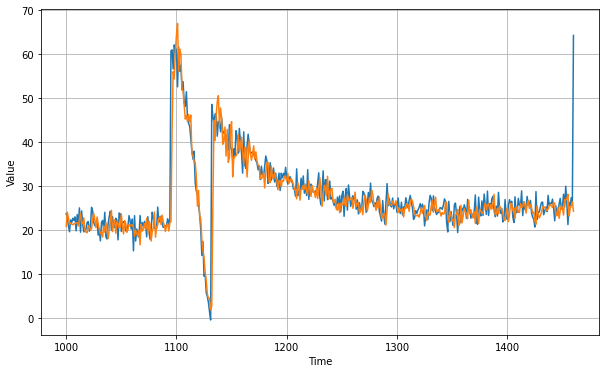

In [0]:
plt.figure(figsize=(10, 6))
plot_series(time[split_time:], series[split_time:])
plot_series(time[split_time:], results[:])
plt.show()

In [0]:
tf.keras.metrics.mean_absolute_error(series[split_time:] ,results[:]).numpy()

2.485035

###Model with the adjustable Learning Rate optimizer 

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(10 , input_shape = [window_size],activation = 'relu'),
                                    tf.keras.layers.Dense(15 , activation = 'relu'),
                                    tf.keras.layers.Dense(1)
])

In [0]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-8 * 10**(epoch/20))

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs ={}):
    if logs.get('accuracy') > .99 :
      print("\nterminating the training as accuracy has reached 99 percent")
      self.model.stop_training = True

callbacks_1 = myCallback()

In [0]:
model.compile(loss = 'mse' , optimizer = tf.keras.optimizers.SGD(lr = 1e-8 , momentum = 0.9))

history = model.fit(dataset , epochs = 100 , callbacks = [lr_schedule] ,verbose = 1)

Epoch 1/100
31/31 [==============================] - 0s 16ms/step - loss: 497.6036
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 463.8171
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 429.5232
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 397.9264
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 368.9909
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 342.7321
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 318.1892
Epoch 8/100
31/31 [==============================] - 0s 5ms/step - loss: 294.5937
Epoch 9/100
31/31 [==============================] - 0s 5ms/step - loss: 271.9925
Epoch 10/100
31/31 [==============================] - 0s 5ms/step - loss: 250.3132
Epoch 11/100
31/31 [==============================] - 0s 5ms/step - loss: 229.5742
Epoch 12/100
31/31 [==============================] - 0s 5ms/step - loss: 209.6770
Epoch 13/100

Let snow plot the loss wrt the learning rates :

(1e-08, 0.001, 0.0, 300.0)

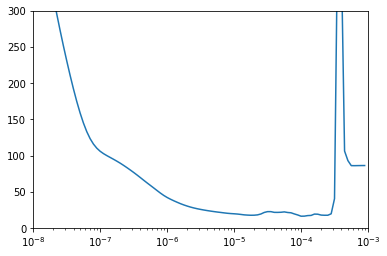

In [0]:
lrs = 1e-8 *(10**(np.arange(100)/20))
plt.semilogx(lrs,history.history['loss'])
plt.axis([1e-8,1e-3,0,300])

So minimum loss occured between 0.0010 - 0.0001 so we will train now with 0.0005

In [0]:
#update teh window size to 30 from 25
window_size = 30 

dataset = windowed_dataset(x_train , window_size , batch_size , shuffle_buffer_size)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(10 , input_shape = [window_size],activation = 'relu'),
                                    tf.keras.layers.Dense(15 , activation = 'relu'),
                                    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mse' , optimizer = tf.keras.optimizers.SGD(lr = 0.0005 , momentum = 0.9))

history = model.fit(dataset,epochs = 500 , verbose = 1)

Epoch 1/500
31/31 [==============================] - 0s 16ms/step - loss: 4136.4698
Epoch 2/500
31/31 [==============================] - 0s 6ms/step - loss: 378.7148
Epoch 3/500
31/31 [==============================] - 0s 6ms/step - loss: 233.9785
Epoch 4/500
31/31 [==============================] - 0s 6ms/step - loss: 159.3550
Epoch 5/500
31/31 [==============================] - 0s 5ms/step - loss: 121.9412
Epoch 6/500
31/31 [==============================] - 0s 5ms/step - loss: 103.2155
Epoch 7/500
31/31 [==============================] - 0s 5ms/step - loss: 93.8393
Epoch 8/500
31/31 [==============================] - 0s 5ms/step - loss: 89.1407
Epoch 9/500
31/31 [==============================] - 0s 5ms/step - loss: 86.7835
Epoch 10/500
31/31 [==============================] - 0s 5ms/step - loss: 85.5990
Epoch 11/500
31/31 [==============================] - 0s 5ms/step - loss: 85.0025
Epoch 12/500
31/31 [==============================] - 0s 5ms/step - loss: 84.7011
Epoch 13/500
31/3

Lets now plot the Loss vs epochs ....

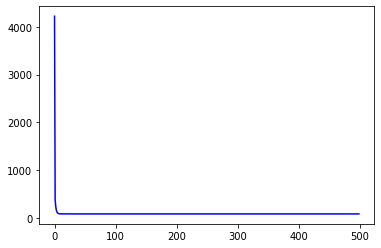

In [0]:
loss = history.history['loss']
epochs = range(len(loss))

plt.plot(epochs , loss , 'b', label  = "Training Loss")
plt.show()

Looks like these many epochs were not required but lets just zoom in :

[85.7210283181102, 85.39408079324309, 85.22348154598905, 85.1331205623666, 85.08436145585837, 85.05743897428218, 85.04218485724066, 85.03328605730509, 85.02793723824098, 85.02462863725485, 85.02252567723855, 85.02115642901549, 85.02024509390606, 85.01963361759776, 85.01921323009373, 85.01892372996537, 85.01872229821903, 85.01858421404337, 85.0184843240325, 85.01841683141964, 85.01836798756393, 85.01833515757139, 85.01831085362386, 85.01829247228878, 85.0182809888702, 85.0182726515937, 85.01826683123087, 85.01826272551547, 85.0182592097017, 85.01825795911022, 85.01825801416771, 85.0182558747911, 85.01825354664597, 85.01825301966716, 85.0182512735583, 85.01825342080028, 85.01825058140706, 85.01825107692443, 85.01824868585645, 85.01824868585645, 85.01824868585645, 85.01824868585645, 85.01824868585645, 85.01824868585645, 85.01824868585645, 85.01824868585645, 85.01824868585645, 85.01824868585645, 85.01824868585645, 85.01824868585645, 85.01824868585645, 85.01824868585645, 85.01824868585645, 

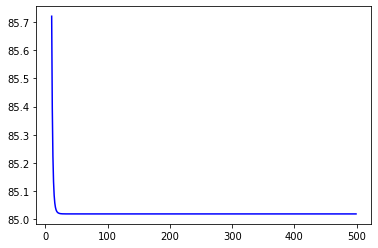

In [0]:
loss = history.history['loss']
epochs = range(10,len(loss))
plot_loss = loss[10:]
print(plot_loss)
print(epochs)
plt.plot(epochs , plot_loss , 'b', label  = "Training Loss")
plt.show()

In [0]:
#code for the generalised output ;

forecast = []

# we make prediction for the entire series :
# but while checking performance take into consideration only the x_text part 
for i in range(len(series) - window_size):
  forecast.append(model.predict(series[i:i+window_size][np.newaxis]))

forecast = forecast[split_time - window_size:]
results = np.array(forecast)[:,0,0]

print(len(forecast))
print(len(results))

461
461


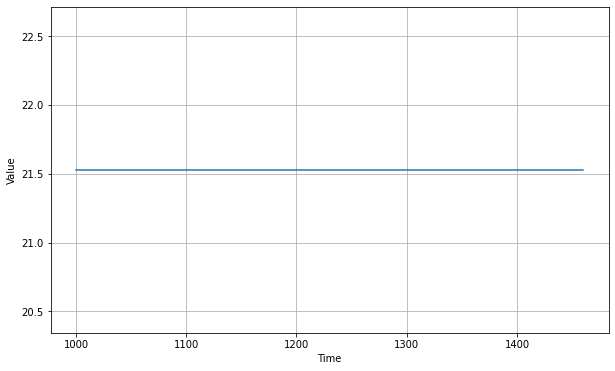

In [0]:
plt.figure(figsize=(10, 6))
#plot_series(time[split_time:], series[split_time:])
plot_series(time[split_time:], results[:])
plt.show()

In [0]:
tf.keras.metrics.mean_absolute_error(series[split_time:] ,results[:]).numpy()

7.1028776

###Exercise 2

Exercise 2 - Predict with a DNN

In class you saw how to split a dataset, and how to start training a DNN using it. For this exercise you’ll create your own synthetic dataset -- I’ve plotted a chart for what it should look like, see if you can figure out the parameters that get this series.

Once you have your series, you’ll create a DNN to predict values for that series!

In [0]:
!pip install tf-nightly-2.0-preview

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-beta0


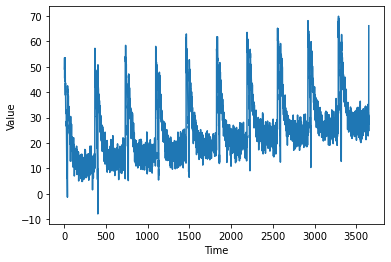

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * np.pi*6),# YOUR CODE HERE # * np.pi),
                    2 / np.exp(9 * season_time))#YOUR CODE HERE# / np.exp(#YOUR CODE HERE# * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)


def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(10 * 365 + 1, dtype="float32")
baseline = 10# YOUR CODE HERE #
series = trend(time, 0.1)# YOUR CODE HERE#)  
baseline = 10
amplitude = 40
slope = 0.005# YOUR CODE HERE#
noise_level = 3# YOUR CODE HERE#

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=51)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

plot_series(time, series)

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [0]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=[window_size], activation="relu"),# YOUR CODE HERE #),
    tf.keras.layers.Dense(10, activation="relu"),# YOUR CODE HERE #, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))# YOUR CODE HERE #, optimizer=# YOUR CODE HERE#))
model.fit(dataset,epochs=150,verbose=1)


Epoch 1/150
94/94 [==============================] - 1s 11ms/step - loss: 103.1341
Epoch 2/150
94/94 [==============================] - 1s 6ms/step - loss: 38.0031
Epoch 3/150
94/94 [==============================] - 1s 7ms/step - loss: 32.4822
Epoch 4/150
94/94 [==============================] - 1s 6ms/step - loss: 30.1395
Epoch 5/150
94/94 [==============================] - 1s 6ms/step - loss: 28.7319
Epoch 6/150
94/94 [==============================] - 1s 6ms/step - loss: 27.7577
Epoch 7/150
94/94 [==============================] - 1s 6ms/step - loss: 27.0182
Epoch 8/150
94/94 [==============================] - 1s 6ms/step - loss: 26.4189
Epoch 9/150
94/94 [==============================] - 1s 6ms/step - loss: 25.9345
Epoch 10/150
94/94 [==============================] - 1s 6ms/step - loss: 25.5547
Epoch 11/150
94/94 [==============================] - 1s 6ms/step - loss: 25.2566
Epoch 12/150
94/94 [==============================] - 1s 7ms/step - loss: 25.0030
Epoch 13/150
94/94 [===

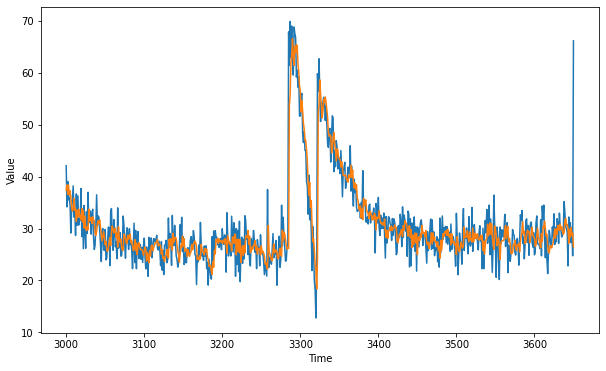

In [0]:
forecast = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()
# EXPECTED OUTPUT
# A Value less than 3

2.9724886

##Week 03

###Install the Updated Libraries 

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


###RNN based model for the Sequence data 

Define the Functions for the series data formation :

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

# a function to plot the data series :

def plot_series(time , series , start = 0, end = None, format = '-'):
  plt.plot(time[start:end],series[start:end],format)
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.grid(True)


def trend(x , slope = 0):
  return slope * x

def seasonality(x , period , amplitude= 1 , phase = 0 ):
  season_time = ((x+phase)%period)/period
  return amplitude * seasonal_pattern(season_time)

def seasonal_pattern(season_time):
  return np.where(season_time < 0.4 , np.cos(season_time * np.pi * 2), 1 /(np.exp(3*season_time)))

def noise_function(time , noise_level = 1 , seed = None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time))* noise_level


Now lets use the defined functions to develop a complex series :


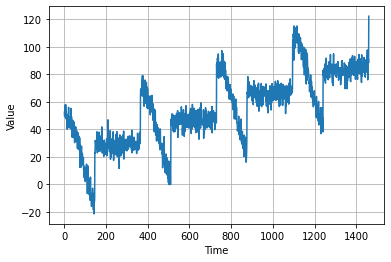

In [0]:
time = np.arange(4*365 + 1 , dtype = "float32")
slope = 0.05

baseline = 10 
amplitude = 40 
noise_level = 5

series = baseline +\
         trend(time , slope) +\
         seasonality(time , period = 365 , amplitude = amplitude) +\
         noise_function(time , noise_level, seed = 42)

plot_series(time , series)
plt.show()

Now lets devide the data into train and test set :

In [0]:
split_time = 1000

x_train = series[:split_time]
train_time = time[:split_time]

x_test =  series[split_time:]
test_time = time[split_time:]

print(x_train.shape , x_test.shape)

(1000,) (461,)


Now its time to write the function to create the dataset from the series :

In [0]:

''' 
Xs = [1,2,3,4,5,6,7,,8,9,10]

window_size = 4
batch_size = 3

Ys  =  [ [ 
           [1,2,3,4][5] ,
           [2,3,4,5][6] ,
           [3,4,5,6][7]   
         ],
         [ [4,5,6,7][8] , 
           [5,6,7,8][9] , 
           [6,7,8,9][10]  
         ]    
       ]
'''

def windowed_dataset(series , window_size , shuffle_buffer ,batch_size ):
  #create the dataset from the series
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1 , shift = 1 , drop_remainder = True)
  dataset = dataset.flat_map(lambda window : window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer)
  dataset = dataset.map(lambda window : (window[:-1],window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

Now lets create the train set from x_train and windowed dataset 

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)


window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

train_set = windowed_dataset(x_train , window_size = window_size, batch_size = batch_size ,shuffle_buffer = shuffle_buffer_size)

Now lets create the model :

In [0]:
model = tf.keras.models.Sequential([
        #input_shape = None means that the input series can be of any length 
        tf.keras.layers.Lambda(lambda x : tf.expand_dims(x,axis = -1 ) , input_shape = [None]),
        tf.keras.layers.SimpleRNN(40 , return_sequences = True),
        tf.keras.layers.SimpleRNN(40),
        tf.keras.layers.Dense(1),
        tf.keras.layers.Lambda(lambda x : x*100.0)
])

Lets now create the instanace for the learning Rate :

In [0]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch :1e-8 * 10**(epoch/20) )

Define the optimizer :

In [0]:
optim = tf.keras.optimizers.SGD(lr = 1e-8 , momentum = 0.9)

Lets now compile the Model :

In [0]:
model.compile(loss = tf.keras.losses.Huber(),
              optimizer = optim,
              metrics = ['mae'])

Time to fit train the model:

In [0]:
history = model.fit(train_set , epochs = 100 , callbacks = [lr_schedule])

Epoch 1/100
31/31 [==============================] - 1s 43ms/step - loss: 46.8438
Epoch 2/100
31/31 [==============================] - 0s 11ms/step - loss: 42.4216
Epoch 3/100
31/31 [==============================] - 0s 11ms/step - loss: 37.3220
Epoch 4/100
31/31 [==============================] - 0s 11ms/step - loss: 31.9262
Epoch 5/100
31/31 [==============================] - 0s 11ms/step - loss: 26.4357
Epoch 6/100
31/31 [==============================] - 0s 10ms/step - loss: 21.5007
Epoch 7/100
31/31 [==============================] - 0s 10ms/step - loss: 18.5011
Epoch 8/100
31/31 [==============================] - 0s 11ms/step - loss: 17.3693
Epoch 9/100
31/31 [==============================] - 0s 11ms/step - loss: 17.0895
Epoch 10/100
31/31 [==============================] - 0s 11ms/step - loss: 16.9721
Epoch 11/100
31/31 [==============================] - 0s 10ms/step - loss: 16.8681
Epoch 12/100
31/31 [==============================] - 0s 10ms/step - loss: 16.7542
Epoch 13/100


Lets now see the change in the loss value over the epochs :

In [0]:
loss = history.history['loss']
epochs = range(len(loss))

plt.plot(epochs , loss , 'b', label  = "Training Loss")
plt.show()

Lets try to zoom in and see the area of the drastic change where the loss reduced the maximum

In [0]:
loss = history.history['loss']
loss = loss[11:21]
epochs = range(11,21)

plt.plot(epochs , loss , 'b', label  = "Training Loss")
plt.show()

Lets now plot How the Loss has changed over the changing Learning Rate :

(1e-08, 0.0001, 0.0, 30.0)

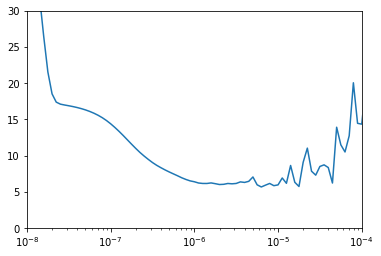

In [0]:
plt.semilogx(history.history['lr'],history.history['loss'])
plt.axis([1e-8,1e-4,0,30])

As we observe that the loss is minimum  when the learning rate is 0.00005. So lets train the model once again with this values and then see the error.

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset(x_train, window_size , batch_size = 128, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

optimizer = tf.keras.optimizers.SGD(lr=5e-5, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(dataset,epochs=400)

Epoch 1/400
8/8 [==============================] - 1s 145ms/step - loss: 80.8704 - mae: 83.5782
Epoch 2/400
8/8 [==============================] - 0s 22ms/step - loss: 23.3276 - mae: 24.1570
Epoch 3/400
8/8 [==============================] - 0s 21ms/step - loss: 17.8614 - mae: 18.4302
Epoch 4/400
8/8 [==============================] - 0s 22ms/step - loss: 11.9517 - mae: 12.5089
Epoch 5/400
8/8 [==============================] - 0s 18ms/step - loss: 9.9229 - mae: 10.1368
Epoch 6/400
8/8 [==============================] - 0s 19ms/step - loss: 13.7531 - mae: 14.3888
Epoch 7/400
8/8 [==============================] - 0s 18ms/step - loss: 9.6444 - mae: 10.0865
Epoch 8/400
8/8 [==============================] - 0s 18ms/step - loss: 11.9429 - mae: 12.3598
Epoch 9/400
8/8 [==============================] - 0s 20ms/step - loss: 13.2042 - mae: 13.7624
Epoch 10/400
8/8 [==============================] - 0s 18ms/step - loss: 9.5772 - mae: 10.0502
Epoch 11/400
8/8 [==============================] -

461
461


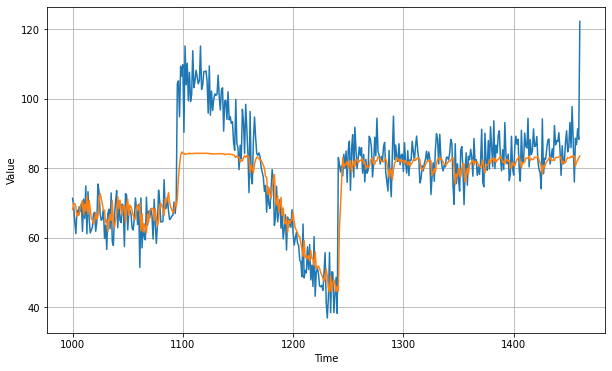

In [0]:
#code for the generalised output ;

forecast = []

# we make prediction for the entire series :
# but while checking performance take into consideration only the x_text part 
for i in range(len(series) - window_size):
  forecast.append(model.predict(series[i:i+window_size][np.newaxis]))

forecast = forecast[split_time - window_size:]
results = np.array(forecast)[:,0,0]

print(len(forecast))
print(len(results))

plt.figure(figsize=(10, 6))

plot_series(test_time, x_test)
plot_series(test_time, results)

In [0]:
tf.keras.metrics.mean_absolute_error(x_test, results).numpy()

6.4141674

<Figure size 432x288 with 0 Axes>

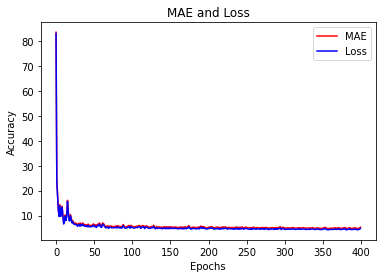

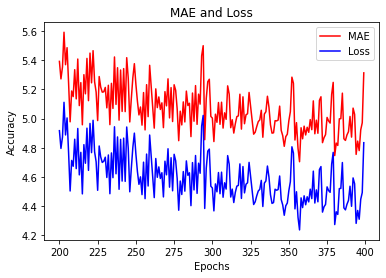

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae = history.history['mae']
loss = history.history['loss']

epochs = range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

###LSTM based Model 

Lets define the functions for the series data creation :

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

Use the Functions defined to create the actual series data 

In [0]:

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series

series = baseline +\
         trend(time, slope) +\
         seasonality(time, period=365, amplitude=amplitude)+\
         noise(time, noise_level, seed=42)

Train Test Split of Dataset :

In [0]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

Define the function for creation of tain test data from the series data :

In [0]:
''' 
Xs = [1,2,3,4,5,6,7,,8,9,10]

window_size = 4
batch_size = 3

Ys  =  [ [ 
           [1,2,3,4][5] ,
           [2,3,4,5][6] ,
           [3,4,5,6][7]   
         ],
         [ [4,5,6,7][8] , 
           [5,6,7,8][9] , 
           [6,7,8,9][10]  
         ]    
       ]
'''

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

Clear the session for fresh Model :

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

Define the parameters for the windowed dataset creation :

In [0]:
window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

Define the **LSTM Model**

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

Define the **LearningRateScheduler** :

In [0]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

Compile the Model :

In [0]:
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9),
              metrics=["mae"])

Now lets train the LSTM based Model :

In [0]:
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 4s 113ms/step - loss: 21.4949 - mae: 22.0115
Epoch 2/100
31/31 [==============================] - 1s 21ms/step - loss: 21.1328 - mae: 21.6472
Epoch 3/100
31/31 [==============================] - 1s 20ms/step - loss: 20.7158 - mae: 21.2292
Epoch 4/100
31/31 [==============================] - 1s 20ms/step - loss: 20.2701 - mae: 20.7798
Epoch 5/100
31/31 [==============================] - 1s 20ms/step - loss: 19.7780 - mae: 20.2896
Epoch 6/100
31/31 [==============================] - 1s 21ms/step - loss: 19.1758 - mae: 19.6838
Epoch 7/100
31/31 [==============================] - 1s 21ms/step - loss: 18.2329 - mae: 18.7455
Epoch 8/100
31/31 [==============================] - 1s 21ms/step - loss: 17.4745 - mae: 17.9816
Epoch 9/100
31/31 [==============================] - 1s 23ms/step - loss: 17.1541 - mae: 17.6597
Epoch 10/100
31/31 [==============================] - 1s 21ms/step - loss: 16.8486 - mae: 17.3525
Epoch 11/100
31/31 [========

Lets now plot the graph of LearningRate Vs Loss to find the optimal Learning Rate :

(1e-08, 0.0001, 0.0, 30.0)

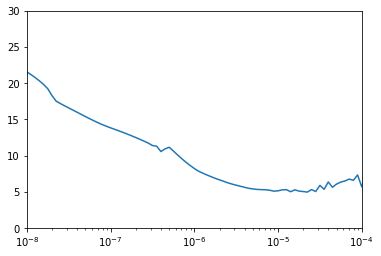

In [0]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

Now lets train the Model with the Optimal Learning Rate :

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

#create the train data
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

#create the model :
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

#Compile the model ;
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9),metrics=["mae"])

#Train the Model :
history = model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500
31/31 [==============================] - 2s 79ms/step - loss: 7146.6124 - mae: 47.4993
Epoch 2/500
31/31 [==============================] - 0s 11ms/step - loss: 1336.4686 - mae: 22.0189
Epoch 3/500
31/31 [==============================] - 0s 10ms/step - loss: 952.8405 - mae: 18.7166
Epoch 4/500
31/31 [==============================] - 0s 13ms/step - loss: 693.7533 - mae: 18.5125
Epoch 5/500
31/31 [==============================] - 0s 13ms/step - loss: 836.5277 - mae: 21.5778
Epoch 6/500
31/31 [==============================] - 0s 13ms/step - loss: 689.9879 - mae: 19.6107
Epoch 7/500
31/31 [==============================] - 0s 13ms/step - loss: 714.2171 - mae: 20.9119
Epoch 8/500
31/31 [==============================] - 0s 13ms/step - loss: 532.3250 - mae: 17.7423
Epoch 9/500
31/31 [==============================] - 0s 13ms/step - loss: 871.6428 - mae: 21.1898
Epoch 10/500
31/31 [==============================] - 0s 13ms/step - loss: 743.6479 - mae: 21.1932
Epoch 11/500
31/3

Lets now do the prediction with this optimal Model trained :

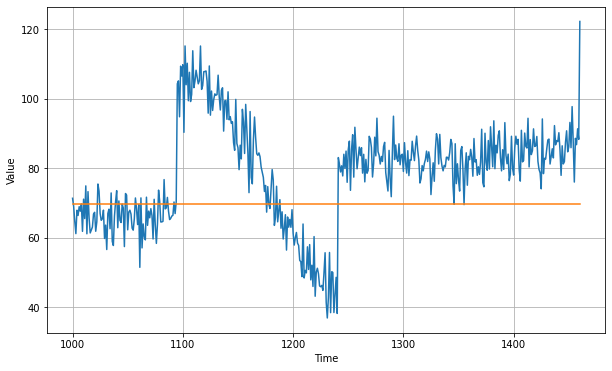

In [0]:
forecast = []
results = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

LEts find the error wrt the original values :

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

14.258361

Lets now observ the parameters :


<Figure size 432x288 with 0 Axes>

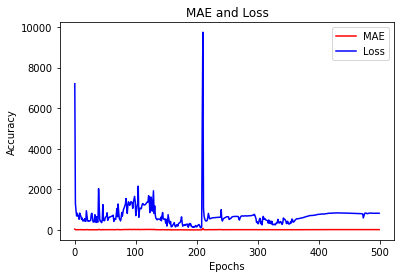

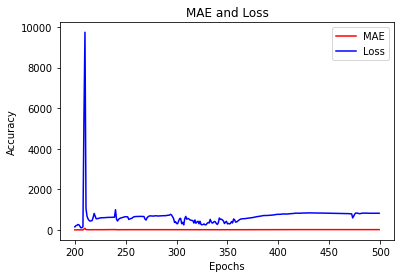

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

### 2 LSTM layers :

In [0]:
tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size , shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))

model.fit(dataset,epochs=100, verbose=1)

Epoch 1/100
31/31 [==============================] - 4s 115ms/step - loss: 1215.1538
Epoch 2/100
31/31 [==============================] - 1s 20ms/step - loss: 147.1766
Epoch 3/100
31/31 [==============================] - 1s 21ms/step - loss: 95.6130
Epoch 4/100
31/31 [==============================] - 1s 20ms/step - loss: 80.0144
Epoch 5/100
31/31 [==============================] - 1s 21ms/step - loss: 75.4509
Epoch 6/100
31/31 [==============================] - 1s 21ms/step - loss: 72.4546
Epoch 7/100
31/31 [==============================] - 1s 21ms/step - loss: 65.2926
Epoch 8/100
31/31 [==============================] - 1s 21ms/step - loss: 60.0033
Epoch 9/100
31/31 [==============================] - 1s 20ms/step - loss: 57.2525
Epoch 10/100
31/31 [==============================] - 1s 20ms/step - loss: 56.5672
Epoch 11/100
31/31 [==============================] - 1s 20ms/step - loss: 56.1517
Epoch 12/100
31/31 [==============================] - 1s 20ms/step - loss: 55.0060
Epoch 13/

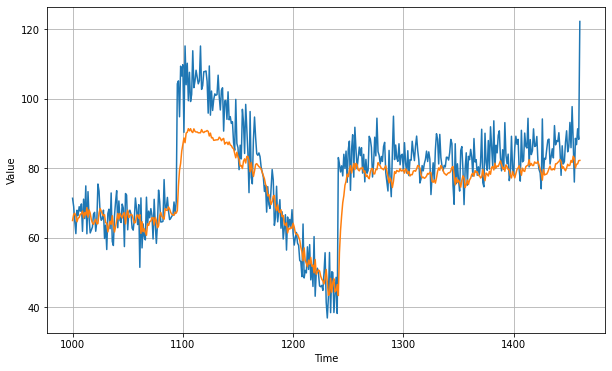

In [0]:
forecast = []
results = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

6.35908

### 3 LSTM Layers & Its Performance 

In [0]:
tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))

model.fit(dataset,epochs=100)

Epoch 1/100
31/31 [==============================] - 5s 166ms/step - loss: 427.5420
Epoch 2/100
31/31 [==============================] - 1s 29ms/step - loss: 118.3621
Epoch 3/100
31/31 [==============================] - 1s 29ms/step - loss: 89.5406
Epoch 4/100
31/31 [==============================] - 1s 30ms/step - loss: 78.6903
Epoch 5/100
31/31 [==============================] - 1s 30ms/step - loss: 73.0461
Epoch 6/100
31/31 [==============================] - 1s 29ms/step - loss: 69.5966
Epoch 7/100
31/31 [==============================] - 1s 29ms/step - loss: 66.8876
Epoch 8/100
31/31 [==============================] - 1s 30ms/step - loss: 64.2462
Epoch 9/100
31/31 [==============================] - 1s 29ms/step - loss: 61.3696
Epoch 10/100
31/31 [==============================] - 1s 30ms/step - loss: 58.6397
Epoch 11/100
31/31 [==============================] - 1s 29ms/step - loss: 56.6098
Epoch 12/100
31/31 [==============================] - 1s 30ms/step - loss: 55.3109
Epoch 13/1

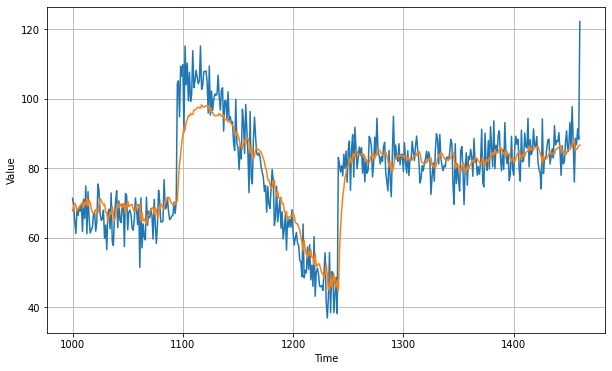

In [0]:
forecast = []
results = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.305975

###Exercise 3 - Mean Absolute Error



In class you learned about RNNs and LSTMs for prediction, as well as a simple methodology to pick a decent learning rate for the stochastic gradient descent optimizer. In this exercise you’ll take a synthetic data set and write the code to pick the learning rate and then train on it to get an MAE of < 3

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

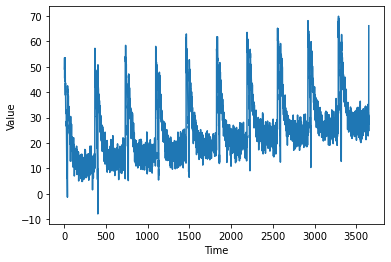

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 6 * np.pi),
                    2 / np.exp(9 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(10 * 365 + 1, dtype = "float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.005
noise_level = 3

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=51)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

plot_series(time, series)

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x : tf.expand_dims(x,axis = -1) , input_shape = [None] ),# YOUR CODE HERE),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  # YOUR CODE HERE
  tf.keras.layers.Lambda(lambda x : x *100.0)# YOUR CODE HERE)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
94/94 [==============================] - 6s 66ms/step - loss: 8.6345 - mae: 9.0221
Epoch 2/100
94/94 [==============================] - 3s 28ms/step - loss: 8.1609 - mae: 8.5435
Epoch 3/100
94/94 [==============================] - 3s 28ms/step - loss: 7.8279 - mae: 8.2059
Epoch 4/100
94/94 [==============================] - 3s 28ms/step - loss: 7.6056 - mae: 7.9815
Epoch 5/100
94/94 [==============================] - 3s 28ms/step - loss: 7.4530 - mae: 7.8250
Epoch 6/100
94/94 [==============================] - 3s 28ms/step - loss: 7.3393 - mae: 7.7092
Epoch 7/100
94/94 [==============================] - 3s 28ms/step - loss: 7.2448 - mae: 7.6123
Epoch 8/100
94/94 [==============================] - 3s 29ms/step - loss: 7.1571 - mae: 7.5238
Epoch 9/100
94/94 [==============================] - 3s 29ms/step - loss: 7.0705 - mae: 7.4365
Epoch 10/100
94/94 [==============================] - 3s 29ms/step - loss: 6.9826 - mae: 7.3484
Epoch 11/100
94/94 [=============================

(1e-08, 0.0001, 0.0, 30.0)

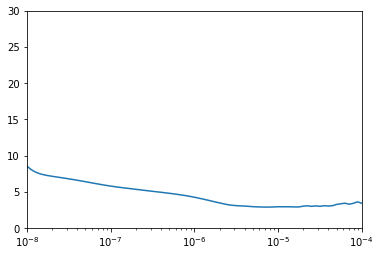

In [0]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

# FROM THIS PICK A LEARNING RATE

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x : tf.expand_dims(x,axis = -1) , input_shape = [None] ),# YOUR CODE HERE),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  # YOUR CODE HERE
  tf.keras.layers.Lambda(lambda x : x *100.0)# YOUR CODE HERE)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr= 1.0e-5, momentum=0.9),metrics=["mae"])# PUT YOUR LEARNING RATE HERE#, momentum=0.9),metrics=["mae"])
history = model.fit(dataset,epochs=200,verbose=1)
                                                            
# FIND A MODEL AND A LR THAT TRAINS TO AN MAE < 3                                                          

Epoch 1/200
94/94 [==============================] - 6s 66ms/step - loss: 317.3262 - mae: 10.6099
Epoch 2/200
94/94 [==============================] - 3s 28ms/step - loss: 43.9133 - mae: 4.3734
Epoch 3/200
94/94 [==============================] - 3s 28ms/step - loss: 38.1663 - mae: 4.0789
Epoch 4/200
94/94 [==============================] - 3s 29ms/step - loss: 35.4673 - mae: 3.9329
Epoch 5/200
94/94 [==============================] - 3s 29ms/step - loss: 34.3148 - mae: 3.8666
Epoch 6/200
94/94 [==============================] - 3s 29ms/step - loss: 35.0763 - mae: 3.9453
Epoch 7/200
94/94 [==============================] - 3s 29ms/step - loss: 32.9886 - mae: 3.7930
Epoch 8/200
94/94 [==============================] - 3s 29ms/step - loss: 33.0332 - mae: 3.8177
Epoch 9/200
94/94 [==============================] - 3s 28ms/step - loss: 31.9545 - mae: 3.7345
Epoch 10/200
94/94 [==============================] - 3s 29ms/step - loss: 31.5508 - mae: 3.7091
Epoch 11/200
94/94 [=================

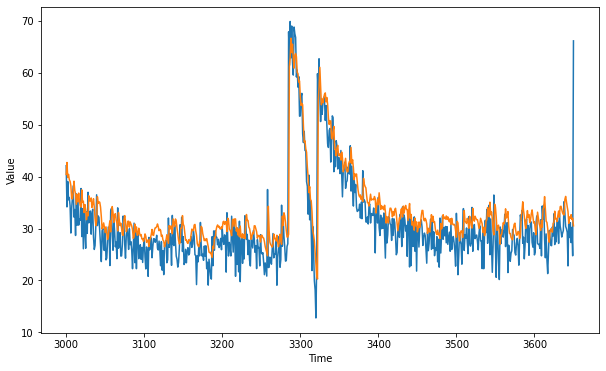

In [0]:
forecast = []
results = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]

plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

# YOUR RESULT HERE SHOULD BE LESS THAN 4

3.8616123

<Figure size 432x288 with 0 Axes>

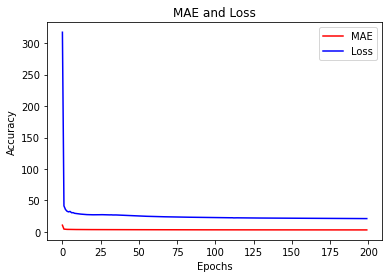

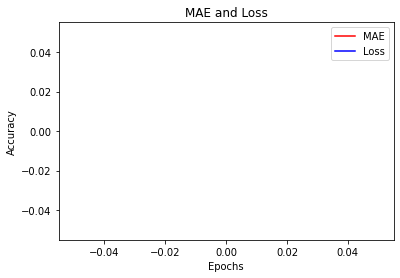

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

##Week 04

###Real Life Problems:

In [0]:
!pip install tensorflow==2.0.0-beta0

     |████████████████████████████████| 87.9MB 37kB/s 
     |████████████████████████████████| 3.1MB 76.1MB/s 
     |████████████████████████████████| 501kB 79.3MB/s 
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc3


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.0.0-beta0


In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [0]:
time = np.arange(4 * 365 + 1, dtype="float32") #this is the x axis for our data 

baseline = 10 #for teh series creation overall 
slope = 0.05  #for trend function 

amplitude = 40 

noise_level = 5 #this is for the noise creation 

# Create the series

series = baseline +\
         trend(time, slope) +\
         seasonality(time, period=365, amplitude=amplitude)+\
         noise(time, noise_level, seed=42)

In [0]:
split_time = 1000

time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

In [0]:
''' 
Xs = [1,2,3,4,5,6,7,,8,9,10]

window_size = 4
batch_size = 3

Ys  =  [ [ 
           [1,2,3,4][5] ,
           [2,3,4,5][6] ,
           [3,4,5,6][7]   
         ],
         [ [4,5,6,7][8] , 
           [5,6,7,8][9] , 
           [6,7,8,9][10]  
         ]    
       ]
'''

print(' ')

In [0]:
# here we first need to take care of the dimestion as in the model we will not have the Lambda Layer any more 
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  
  series = tf.expand_dims(series , axis = -1 )
  
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder = True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1:]))
  dataset = dataset.batch(batch_size).prefetch(1)
  
  return dataset

In [0]:
# lets write a function for the model forecast rather than the individual calls :

def model_forecast(model, series , window_size ):

  mydata = tf.data.Dataset.from_tensor_slices(series)
  mydata = mydata.window(window_size , shift = 1 , drop_remainder = True)
  mydata = mydata.flat_map(lambda window : window.batch(window_size))
  mydata = mydata.batch(32).prefetch(1)
  forecast = model.predict(mydata)

  return forecast

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [0]:
window_size = 30
batch_size = 128
shuffle_buffer_size = 1000

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters = 32 , kernel_size = 5 ,
                         strides = 1 , padding = 'causal',
                         activation = 'relu',
                         input_shape = [None,1]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences = True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences = True)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200.0)
])

Now that we have specified the shape in the Convolution Layer of the Model we nned to modify the windowed_data function :

In [0]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [0]:
model.compile(loss = tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9),
              metrics=["mae"])

In [0]:
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
8/8 [==============================] - 3s 426ms/step - loss: 73.7833 - mae: 74.1150
Epoch 2/100
8/8 [==============================] - 1s 67ms/step - loss: 73.0351 - mae: 73.3971
Epoch 3/100
8/8 [==============================] - 1s 64ms/step - loss: 71.8754 - mae: 72.2451
Epoch 4/100
8/8 [==============================] - 1s 63ms/step - loss: 70.4263 - mae: 70.8026
Epoch 5/100
8/8 [==============================] - 0s 62ms/step - loss: 68.7344 - mae: 69.1172
Epoch 6/100
8/8 [==============================] - 1s 64ms/step - loss: 66.8004 - mae: 67.1908
Epoch 7/100
8/8 [==============================] - 1s 63ms/step - loss: 64.6024 - mae: 65.0022
Epoch 8/100
8/8 [==============================] - 1s 64ms/step - loss: 62.0938 - mae: 62.5067
Epoch 9/100
8/8 [==============================] - 0s 62ms/step - loss: 59.2056 - mae: 59.6389
Epoch 10/100
8/8 [==============================] - 0s 61ms/step - loss: 55.8366 - mae: 56.3058
Epoch 11/100
8/8 [==============================

(1e-08, 0.0001, 0.0, 30.0)

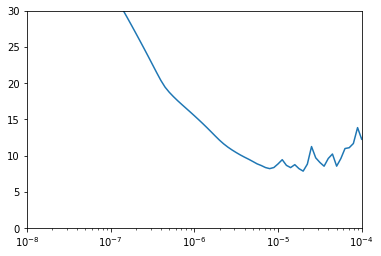

In [0]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()

window_size = 30
batch_size = 128
shuffle_buffer_size = 1000

#create the train data
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

#create the model :
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters = 32 , kernel_size = 5,
                         strides = 1 , padding = 'causal',
                         activation = 'relu',
                         input_shape=[None,1]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences = True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences = True)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200.0)
])

#Compile the model ;
model.compile(loss = tf.keras.losses.Huber(), 
              optimizer = tf.keras.optimizers.SGD(lr = 1e-5, momentum = 0.9),
              metrics=["mae"])

#Train the Model :
history = model.fit(dataset,epochs=500,verbose=1)

Epoch 1/500
8/8 [==============================] - 3s 421ms/step - loss: 47.8501 - mae: 48.8041
Epoch 2/500
8/8 [==============================] - 0s 62ms/step - loss: 26.6298 - mae: 27.4308
Epoch 3/500
8/8 [==============================] - 1s 63ms/step - loss: 17.1482 - mae: 17.6485
Epoch 4/500
8/8 [==============================] - 1s 66ms/step - loss: 14.0402 - mae: 14.5277
Epoch 5/500
8/8 [==============================] - 1s 65ms/step - loss: 11.5962 - mae: 12.0606
Epoch 6/500
8/8 [==============================] - 0s 61ms/step - loss: 10.3063 - mae: 10.7513
Epoch 7/500
8/8 [==============================] - 0s 62ms/step - loss: 9.5450 - mae: 9.9843
Epoch 8/500
8/8 [==============================] - 1s 63ms/step - loss: 8.8979 - mae: 9.3356
Epoch 9/500
8/8 [==============================] - 1s 64ms/step - loss: 8.4129 - mae: 8.8502
Epoch 10/500
8/8 [==============================] - 1s 63ms/step - loss: 8.1100 - mae: 8.5444
Epoch 11/500
8/8 [==============================] - 1s 6

In [0]:
rnn_forecast = model_forecast(model , series[...,np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1,-1,0]

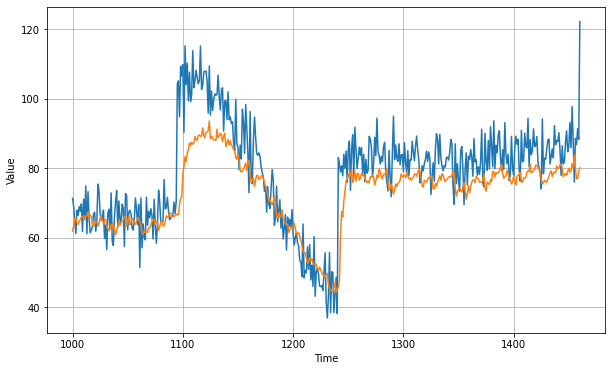

In [0]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

7.3544884

<Figure size 432x288 with 0 Axes>

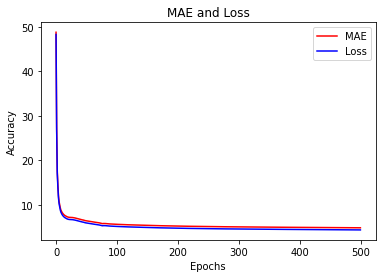

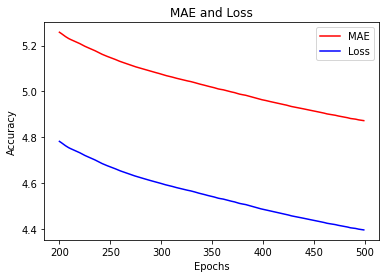

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae = history.history['mae']
loss = history.history['loss']

epochs = range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

###SunSpots Problem :

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
print(tf.__version__)

2.0.0-beta0


Function for Plotting the Data:

In [0]:
def plot_series(x,y,format = '-',start = 0 , end = None):
  plt.plot(x[start:end],y[start:end],format)
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.grid(True)

Download the Data :

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/Sunspots.csv \
    -O /tmp/sunspots.csv

Read the Data :

Shape of data_X : 3235
Shape of the Data_Y is : 3235


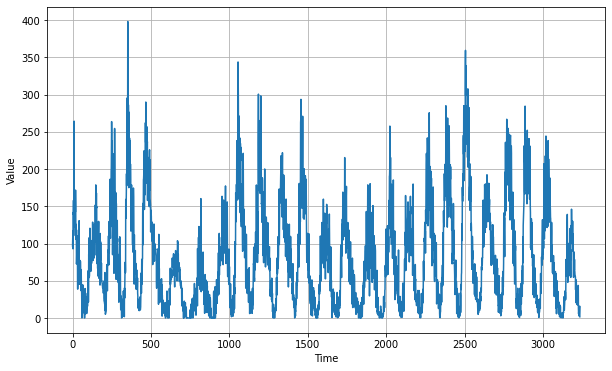

In [0]:
import csv
time_step = []
sunspots = []

with open('/tmp/sunspots.csv') as csvfile:
  reader = csv.reader(csvfile,delimiter = ',')
  #skip the first row as it is the column names 
  next(reader)
  for row in reader:
    #type cast before appending the data
    sunspots.append(float(row[2]))
    time_step.append(int(row[0]))

#check the shape of teh data read:
print(f'Shape of data_X : {len(sunspots)}')
print(f'Shape of the Data_Y is : {len(time_step)}')

#Now the data is in a list format 
#Lets convert into numpy array for convineance

series = np.array(sunspots)
time = np.array(time_step)


#Now lwts plot the data read :
plt.figure(figsize = (10,6))
plot_series(time,series)

Train Test Split :

In [0]:
split_time = 3000

time_train = time[ : split_time]
x_train = series[ : split_time]

time_valid = time[split_time : ]
x_valid = series[split_time : ]

In [0]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(3000,)


Define some parameters: You can play with these to improve the Model Accuracy:

In [0]:
window_size = 60
batch_size = 32
shuffle_buffer_size = 1000

Now lwts define the function to convert the series into Xs and Ys:

In [0]:
# input = Numpay array called series 
# Output = dataset  with Xs and Ys bundled in batches :

''' 
Xs = [1,2,3,4,5,6,7,,8,9,10]

window_size = 4
batch_size = 3

Ys  =  [ [ 
           [1,2,3,4][5] ,
           [2,3,4,5][6] ,
           [3,4,5,6][7]   
         ],
         [ [4,5,6,7][8] , 
           [5,6,7,8][9] , 
           [6,7,8,9][10]  
         ]    
       ]
'''
def windowed_dataset(series , window_size , batch_size ,shuffle_buffer_size):
  series = np.expand_dims(series , axis = -1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  dataset = ds.window(window_size + 1, shift = 1 , drop_remainder = True)
  dataset = dataset.flat_map(lambda window : window.batch(window_size+1))
  dataset = dataset.shuffle(shuffle_buffer_size).map(lambda window :(window[:-1],window[:-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

Now lets create the dataset and Model and compile nad fit :

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(x_train , window_size = 60,batch_size = 32, shuffle_buffer_size = 1000)

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters = 32, kernel_size = 5,
                               padding = 'causal',strides = 1,
                               activation = 'relu',
                               input_shape= [None,1]),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences = True)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences = True)),
       tf.keras.layers.Dense(20,activation = 'relu'),
       tf.keras.layers.Dense(10 , activation = 'relu'),
       tf.keras.layers.Dense(1),
       tf.keras.layers.Lambda(lambda x:x*400)
])


lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda x :1e-8 * 10**(x/20))

model.compile(optimizer = tf.keras.optimizers.SGD(lr = 1e-8,momentum = 0.9),
              loss = tf.keras.losses.Huber(),
              metrics = ['mae'])


history = model.fit(train_set,epochs = 100 , callbacks = [lr_schedule])



Epoch 1/100
92/92 [==============================] - 12s 127ms/step - loss: 194.0902 - mae: 194.5974
Epoch 2/100
92/92 [==============================] - 8s 83ms/step - loss: 134.4065 - mae: 134.9307
Epoch 3/100
92/92 [==============================] - 8s 85ms/step - loss: 84.9277 - mae: 85.4330
Epoch 4/100
92/92 [==============================] - 8s 84ms/step - loss: 58.9969 - mae: 59.4945
Epoch 5/100
92/92 [==============================] - 8s 82ms/step - loss: 45.8833 - mae: 46.3772
Epoch 6/100
92/92 [==============================] - 7s 79ms/step - loss: 40.4815 - mae: 40.9751
Epoch 7/100
92/92 [==============================] - 7s 81ms/step - loss: 38.1124 - mae: 38.6059
Epoch 8/100
92/92 [==============================] - 7s 81ms/step - loss: 36.5875 - mae: 37.0813
Epoch 9/100
92/92 [==============================] - 7s 81ms/step - loss: 35.2610 - mae: 35.7549
Epoch 10/100
92/92 [==============================] - 7s 81ms/step - loss: 33.9845 - mae: 34.4784
Epoch 11/100
92/92 [===

Lets now plot the loss vs lr so that we get to select the best learning rate :

(1e-08, 0.0001, 0.0, 60.0)

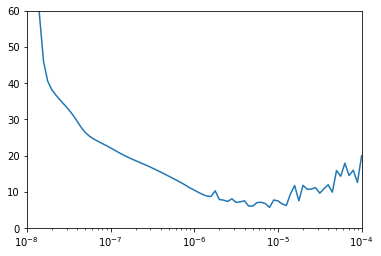

In [0]:
plt.semilogx(history.history['lr'] ,history.history['loss'])
plt.axis([1e-8,1e-4,0,60])

Now that we know the best learnig rate,lets train the model with that learning rate for more number of epochs:

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset(x_train , window_size = 60 , batch_size = 16 , shuffle_buffer_size = 1000)

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters = 32, kernel_size = 5,
                               padding = 'causal',strides = 1,
                               activation = 'relu',
                               input_shape= [None,1]),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences = True)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences = True)),
       tf.keras.layers.Dense(20,activation = 'relu'),
       tf.keras.layers.Dense(10 , activation = 'relu'),
       tf.keras.layers.Dense(1),
       tf.keras.layers.Lambda(lambda x:x*400)
])



model.compile(optimizer = tf.keras.optimizers.SGD(lr = 2e-5,momentum = 0.9),
              loss = tf.keras.losses.Huber(),
              metrics = ['mae'])


history = model.fit(train_set,epochs = 100 )

Epoch 1/100
92/92 [==============================] - 12s 128ms/step - loss: 26.2528 - mae: 26.7554
Epoch 2/100
92/92 [==============================] - 7s 81ms/step - loss: 17.1913 - mae: 17.6794
Epoch 3/100
92/92 [==============================] - 7s 81ms/step - loss: 14.7749 - mae: 15.2627
Epoch 4/100
92/92 [==============================] - 7s 81ms/step - loss: 11.3474 - mae: 11.8389
Epoch 5/100
92/92 [==============================] - 7s 80ms/step - loss: 8.3612 - mae: 8.8441
Epoch 6/100
92/92 [==============================] - 8s 82ms/step - loss: 7.4888 - mae: 7.9686
Epoch 7/100
92/92 [==============================] - 8s 82ms/step - loss: 8.1176 - mae: 8.5993
Epoch 8/100
92/92 [==============================] - 7s 81ms/step - loss: 5.6267 - mae: 6.1039
Epoch 9/100
92/92 [==============================] - 7s 81ms/step - loss: 7.9682 - mae: 8.4509
Epoch 10/100
92/92 [==============================] - 7s 81ms/step - loss: 8.0512 - mae: 8.5356
Epoch 11/100
92/92 [===================

Now lets make the model predict :

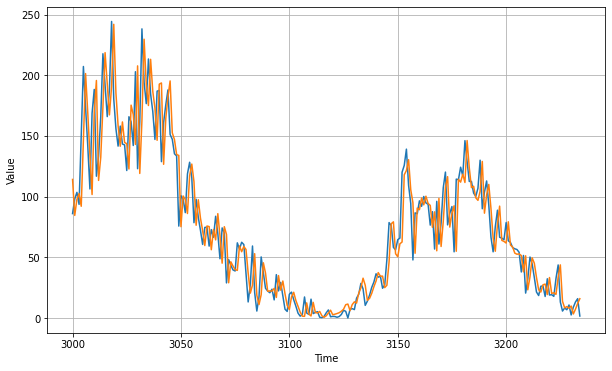

Model Error on Predicted Values :  16.189394


In [0]:
def model_forecast(model, series , window_size ):

  mydata = tf.data.Dataset.from_tensor_slices(series)
  mydata = mydata.window(window_size , shift = 1 , drop_remainder = True)
  mydata = mydata.flat_map(lambda window : window.batch(window_size))
  mydata = mydata.batch(32).prefetch(1)
  forecast = model.predict(mydata)

  return forecast

rnn_forecast = model_forecast(model , series[...,np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1,-1,0]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)
plt.show()

print("Model Error on Predicted Values : ",tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy())

### Excercise - 04 : Sunspots


Exercise 4 - Sunspots

This week you moved away from synthetic data to do a real-world prediction -- sunspots. You loaded data from CSV and built models to use it. For this week’s exercise, you’ll use a dataset from Jason Brownlee, author of the amazing MachineLearningMastery.com site and who has shared lots of datasets at https://github.com/jbrownlee/Datasets. It’s a dataset of daily minimum temperatures in the city of Melbourne, Australia measured from 1981 to 1990.  Your task is to download the dataset, parse the CSV, create a time series and build a prediction model from it. Your model should have an MAE of less than 2, and as you can see in the output, mine had 1.78. I’m sure you can beat that! :)

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [0]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv \
    -O /tmp/daily-min-temperatures.csv

--2020-04-28 10:54:16--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘/tmp/daily-min-temperatures.csv’

/tmp/daily-min-temp 100%[===================>]  66.33K  --.-KB/s    in 0.03s   

2020-04-28 10:54:16 (2.59 MB/s) - ‘/tmp/daily-min-temperatures.csv’ saved [67921/67921]



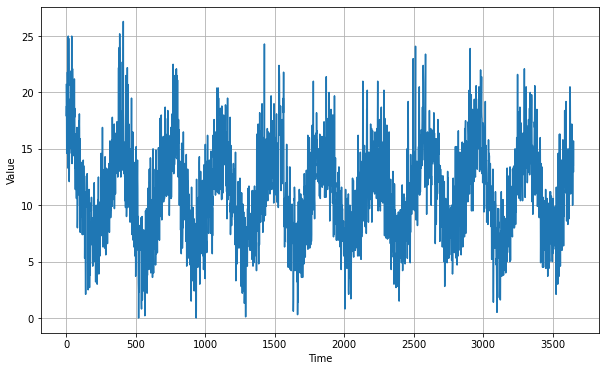

In [0]:
import csv
time_step = []
temps = []

with open('/tmp/daily-min-temperatures.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader)
  i = 1 

  for rows in reader:
    time_step.append(i)
    i = i + 1
    temps.append(float(rows[1]))

# YOUR CODE HERE. READ TEMPERATURES INTO TEMPS
# HAVE TIME STEPS BE A SIMPLE ARRAY OF 1, 2, 3, 4 etc

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [0]:
split_time = 2500

time_train = time[:split_time] # YOUR CODE HERE
x_train = series[:split_time]# YOUR CODE HERE

time_valid = time[split_time:]# YOUR CODE HERE
x_valid = series[split_time:]# YOUR CODE HERE

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000


In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = np.expand_dims(series , axis = -1)

  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size+1 , shift = 1 , drop_remainder = True)
  dataset = dataset.flat_map(lambda x :  x.batch(window_size+1))
  dataset = dataset.shuffle(shuffle_buffer)
  dataset = dataset.map(lambda x : (x[:-1],x[-1:]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset
    # YOUR CODE HERE

In [0]:
def model_forecast(model, series, window_size):

  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size , shift = 1 , drop_remainder = True)
  dataset = dataset.flat_map(lambda x :  x.batch(window_size))
  dataset = dataset.batch(32).prefetch(1)
  predicted = model.predict(dataset)
  return predicted

    # YOUR CODE HERE

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
# YOUR CODE HERE
       tf.keras.layers.Conv1D(filters = 32, kernel_size = 5,
                               padding = 'causal',strides = 1,
                               activation = 'relu',
                               input_shape= [None,1]),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences = True)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences = True)),
       tf.keras.layers.Dense(20,activation = 'relu'),
       tf.keras.layers.Dense(10 , activation = 'relu'),
       tf.keras.layers.Dense(1),
       tf.keras.layers.Lambda(lambda x:x*100)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=200, callbacks=[lr_schedule])


<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(2500,)
Epoch 1/200
10/10 [==============================] - 7s 719ms/step - loss: 42.1369 - mae: 42.6199
Epoch 2/200
10/10 [==============================] - 3s 292ms/step - loss: 41.9548 - mae: 42.4417
Epoch 3/200
10/10 [==============================] - 3s 286ms/step - loss: 41.6815 - mae: 42.1699
Epoch 4/200
10/10 [==============================] - 3s 284ms/step - loss: 41.3509 - mae: 41.8405
Epoch 5/200
10/10 [==============================] - 3s 283ms/step - loss: 40.9727 - mae: 41.4636
Epoch 6/200
10/10 [==============================] - 3s 285ms/step - loss: 40.5476 - mae: 41.0398
Epoch 7/200
10/10 [==============================] - 3s 285ms/step - loss: 40.0742 - mae: 40.5678
Epoch 8/200
10/10 [==============================] - 3s 290ms/step - loss: 39.5500 - mae: 40.0452
Epoch 9/200
10/10 [==============================] - 3s 286ms/step - loss: 38.9739 - mae: 39.4706
Epoch 10/200
10/

(1e-08, 0.0001, 0.0, 20.0)

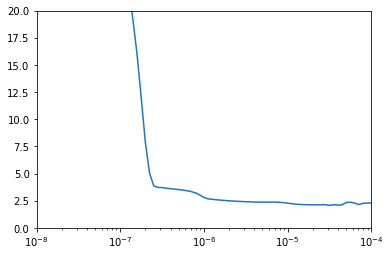

In [0]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0,20])

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(x_train, window_size = 60, batch_size = 100, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
# YOUR CODE HERE
      tf.keras.layers.Conv1D(filters = 32, kernel_size = 5,
                               padding = 'causal',strides = 1,
                               activation = 'relu',
                               input_shape= [None,1]),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences = True)),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences = True)),
       tf.keras.layers.Dense(20,activation = 'relu'),
       tf.keras.layers.Dense(10 , activation = 'relu'),
       tf.keras.layers.Dense(1),
       tf.keras.layers.Lambda(lambda x:x*100)
])


optimizer = tf.keras.optimizers.SGD(lr= 3.98e-05 ,momentum = 0.9)# YOUR CODE HERE, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=200)# YOUR CODE HERE)
                                    
# EXPECTED OUTPUT SHOULD SEE AN MAE OF <2 WITHIN ABOUT 30 EPOCHS

Epoch 1/200
25/25 [==============================] - 8s 302ms/step - loss: 9.2192 - mae: 9.8649
Epoch 2/200
25/25 [==============================] - 3s 127ms/step - loss: 2.5074 - mae: 2.9736
Epoch 3/200
25/25 [==============================] - 3s 127ms/step - loss: 2.2094 - mae: 2.6665
Epoch 4/200
25/25 [==============================] - 3s 129ms/step - loss: 2.2056 - mae: 2.6637
Epoch 5/200
25/25 [==============================] - 3s 128ms/step - loss: 2.1911 - mae: 2.6486
Epoch 6/200
25/25 [==============================] - 3s 126ms/step - loss: 2.1813 - mae: 2.6385
Epoch 7/200
25/25 [==============================] - 3s 127ms/step - loss: 2.1728 - mae: 2.6299
Epoch 8/200
25/25 [==============================] - 3s 128ms/step - loss: 2.1554 - mae: 2.6126
Epoch 9/200
25/25 [==============================] - 3s 126ms/step - loss: 2.1571 - mae: 2.6117
Epoch 10/200
25/25 [==============================] - 3s 127ms/step - loss: 2.1770 - mae: 2.6347
Epoch 11/200
25/25 [===================

In [0]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

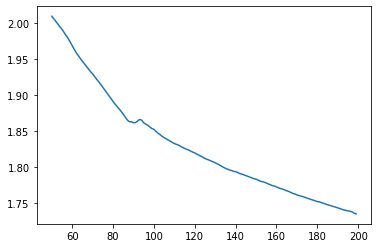

In [0]:
epochs = np.arange(len(history.history["loss"]))
plt.plot(epochs[50:], history.history["loss"][50:])
plt.show()

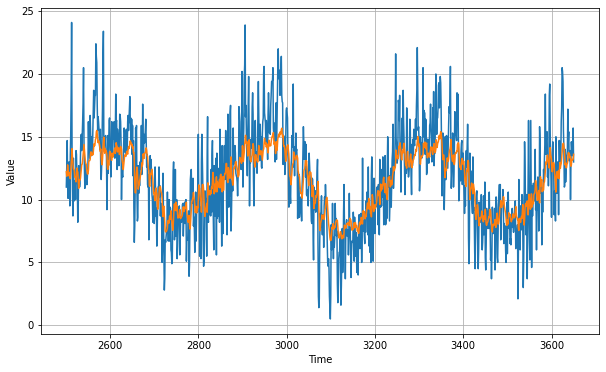

In [0]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

# EXPECTED OUTPUT. PLOT SHOULD SHOW PROJECTIONS FOLLOWING ORIGINAL DATA CLOSELY

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

# EXPECTED OUTPUT MAE < 2 -- I GOT 1.789626

2.0173368

In [0]:
print(rnn_forecast)
# EXPECTED OUTPUT -- ARRAY OF VALUES IN THE LOW TEENS

[12.210557 11.862871 12.142491 ... 13.173896 13.235853 13.605388]
